# Dataset Understanding & Preprocessing

## Load the dataset

In [1]:
!pip install spacy

import pandas as pd
import matplotlib.pyplot as plt

import os
!pip3 install wordcloud
!pip3 install plotly
!pip3 install textblob
!pip3 install --upgrade seaborn

import re
import string
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import nltk





The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
# Set working directory
os.chdir('/Users/kanchankukreti/Desktop/Dessertation/Fake New Detection project')

# Load datasets
true_data = pd.read_csv("data/True.csv")
fake_data = pd.read_csv("data/Fake.csv")

true_data.head(11)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [3]:
fake_data.head(11)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
# Add labels
true_data["label"] = 1
fake_data["label"] = 0

# Combine datasets
data = pd.concat([true_data, fake_data], ignore_index=True)


In [5]:

# Dataset overview
print("Dataset Loaded Successfully")
print(data.info())

# View first few rows
print("Sample Data:")
display(data.head(10))


Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
Sample Data:


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [6]:
# Create directory if it doesn't exist
os.makedirs("cleaned_data", exist_ok=True)

# Save initial merged dataset
data.to_csv("cleaned_data/merged_dataset.csv", index=False)
print("Merged dataset saved successfully!")

Merged dataset saved successfully!


## Checking the Missing Values

In [7]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


##### Note: There is not missing value in any coloum

## Checking duplicates and handling them

In [8]:
# Check for duplicates

print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 209


In [9]:
# Check class distribution

print("\nClass Distribution:")
print(data['label'].value_counts())


Class Distribution:
label
0    23481
1    21417
Name: count, dtype: int64


In [10]:
# View Some Duplicate Rows

duplicate_data = data[data.duplicated()]
print("Sample of Duplicate Rows:")
print(duplicate_data.head())

Sample of Duplicate Rows:
                                                 title  \
445  Senate tax bill stalls on deficit-focused 'tri...   
778  Trump warns 'rogue regime' North Korea of grav...   
892  Republicans unveil tax cut bill, but the hard ...   
896  Trump taps Fed centrist Powell to lead U.S. ce...   
974  Two ex-Trump aides charged in Russia probe, th...   

                                                  text       subject  \
445  WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
778  BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   
892  WASHINGTON (Reuters) - U.S. House of Represent...  politicsNews   
896  WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   
974  WASHINGTON (Reuters) - Federal investigators p...  politicsNews   

                   date  label  
445  November 30, 2017       1  
778   November 8, 2017       1  
892   November 2, 2017       1  
896   November 2, 2017       1  
974   October 30, 2017     

In [1]:
# Count Duplicates by Label

print("\nDuplicate Labels Distribution:")
print(duplicate_data['label'].value_counts())


Duplicate Labels Distribution:


NameError: name 'duplicate_data' is not defined

##### Note: we should remove exact duplicates because:
##### 1.They do not add new information to our dataset.                                       2.Keeping them may bias our model toward true news since most duplicates are from label 1 .

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Verify the new shape
print(f"Dataset shape after removing duplicates: {data_cleaned.shape}")

# Double-check class distribution
print("Updated Class Distribution After Duplicate Removal:")
print(data_cleaned['label'].value_counts())

# Re-plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=data_cleaned['label'], palette=["red", "blue"])
plt.xticks([0, 1], ['Fake News', 'True News'])
plt.title("Updated Class Distribution: Fake vs. True News")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()


ERROR! Session/line number was not unique in database. History logging moved to new session 2


NameError: name 'data' is not defined

In [ ]:
# Save cleaned dataset
data_cleaned.to_csv("cleaned_data/cleaned_no_duplicates.csv", index=False)
# Confirm the saved dataset by reloading it
data_saved = pd.read_csv('cleaned_data/cleaned_no_duplicates.csv')
# Check if the shape remains the same
print(f"Dataset successfully saved! Shape: {data_saved.shape}")


## Box Plot for Word Count & Character Count

In [15]:
data_cleaned = data.copy()  # This creates a separate DataFrame, avoiding the warning


In [16]:
data_cleaned['word_count'] = data_cleaned['text'].apply(lambda x: len(x.split()))
data_cleaned['char_count'] = data_cleaned['text'].apply(len)


In [17]:
print("Word Count and Character Count successfully added.")
print(data_cleaned[['word_count', 'char_count']].head())  # Confirm changes

Word Count and Character Count successfully added.
   word_count  char_count
0         749        4659
1         624        4077
2         457        2789
3         376        2461
4         852        5204


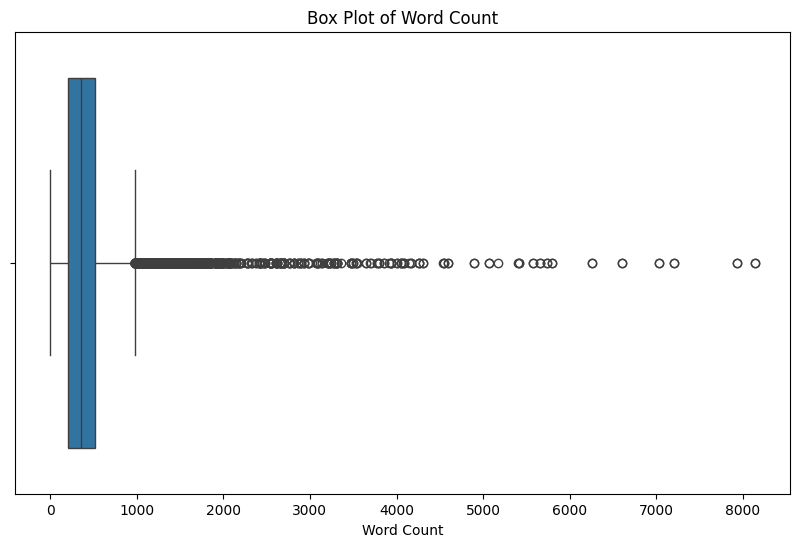

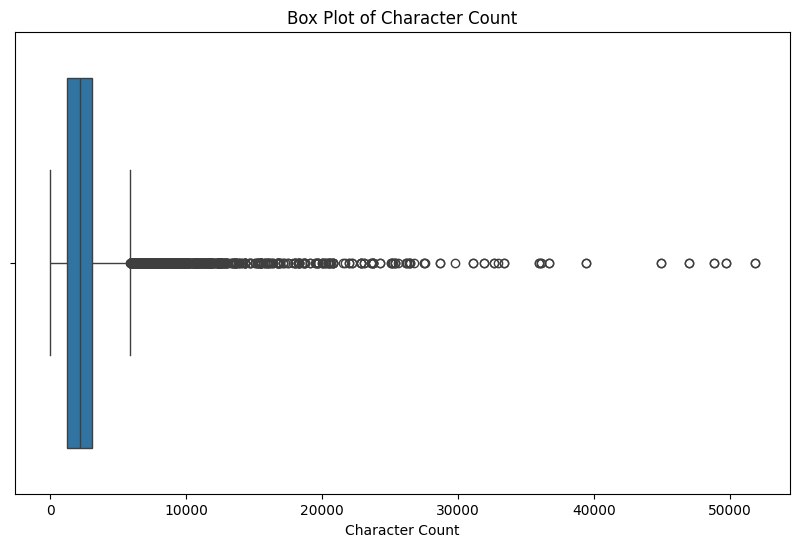

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot for Word Count
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['word_count'])
plt.title("Box Plot of Word Count")
plt.xlabel("Word Count")
plt.show()

# Box Plot for Character Count
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['char_count'])
plt.title("Box Plot of Character Count")
plt.xlabel("Character Count")
plt.show()


/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


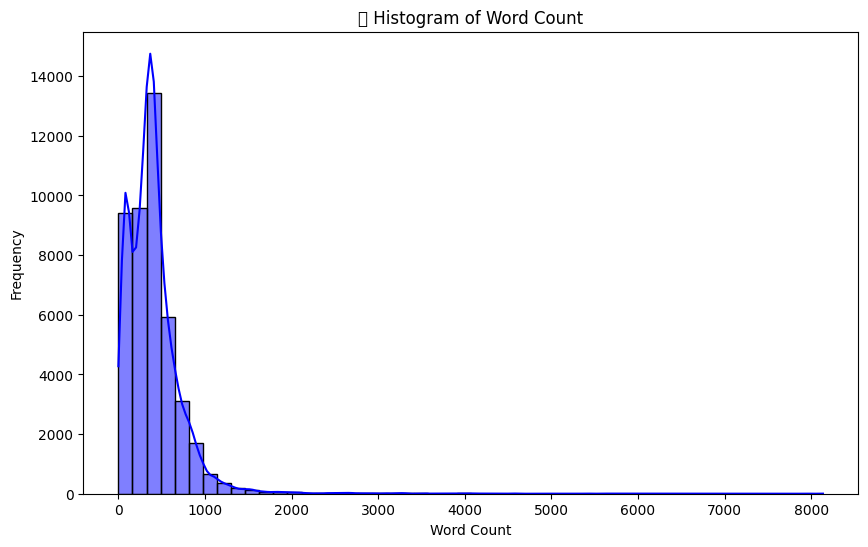

/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


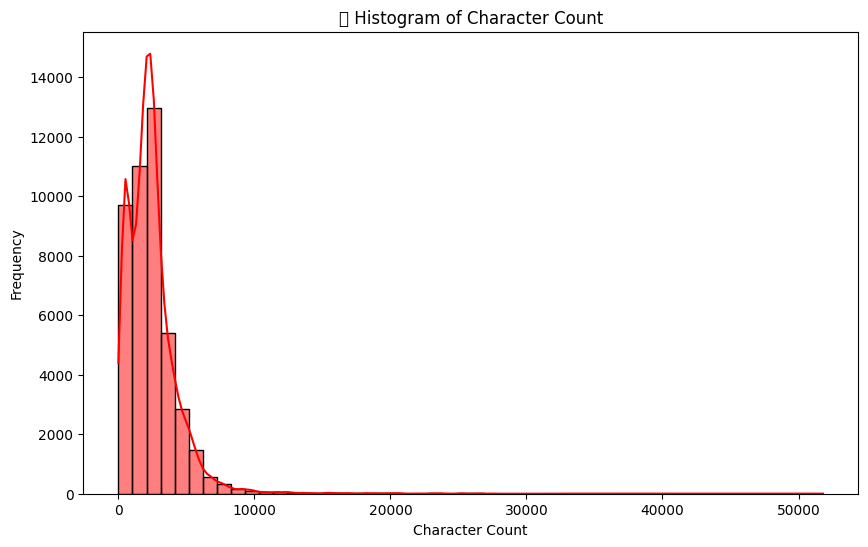

In [19]:
# Histogram for Word Count
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['word_count'], bins=50, kde=True, color='blue')
plt.title("Histogram of Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Histogram for Character Count
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['char_count'], bins=50, kde=True, color='red')
plt.title("Histogram of Character Count")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()


In [20]:
# Calculate IQR for Word Count
Q1_word = data_cleaned['word_count'].quantile(0.25)
Q3_word = data_cleaned['word_count'].quantile(0.75)
IQR_word = Q3_word - Q1_word
lower_bound_word = Q1_word - 1.5 * IQR_word
upper_bound_word = Q3_word + 1.5 * IQR_word

# Count outliers
word_outliers = data_cleaned[(data_cleaned['word_count'] < lower_bound_word) | (data_cleaned['word_count'] > upper_bound_word)]
print(f"Number of Outliers (Word Count): {len(word_outliers)}")

# Calculate IQR for Character Count
Q1_char = data_cleaned['char_count'].quantile(0.25)
Q3_char = data_cleaned['char_count'].quantile(0.75)
IQR_char = Q3_char - Q1_char
lower_bound_char = Q1_char - 1.5 * IQR_char
upper_bound_char = Q3_char + 1.5 * IQR_char

# Count outliers
char_outliers = data_cleaned[(data_cleaned['char_count'] < lower_bound_char) | (data_cleaned['char_count'] > upper_bound_char)]
print(f"Number of Outliers (Character Count): {len(char_outliers)}")


📌 Number of Outliers (Word Count): 1678
📌 Number of Outliers (Character Count): 1767


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/4276686138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_cleaned['label'], y=data_cleaned['word_count'], palette=["red", "blue"])
/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


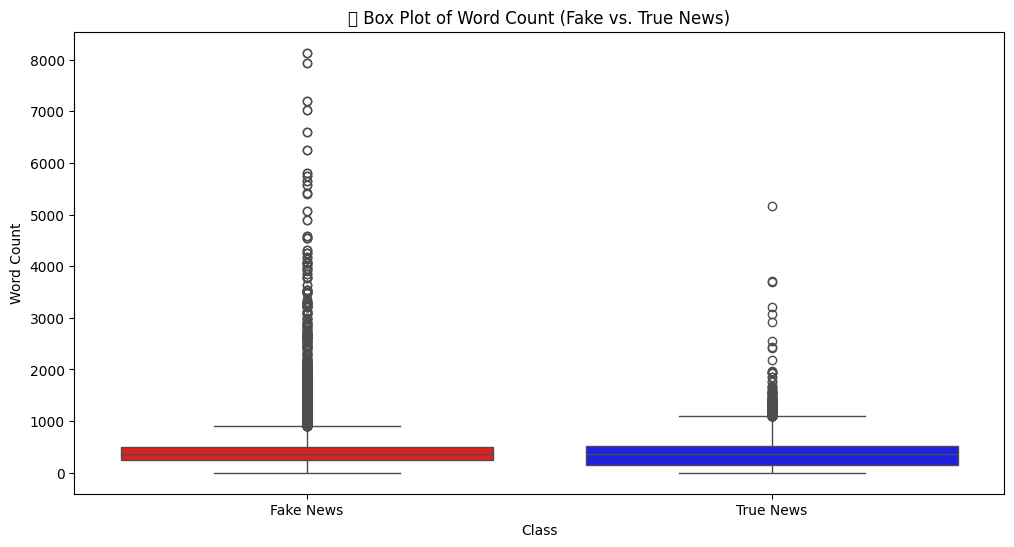

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/4276686138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_cleaned['label'], y=data_cleaned['char_count'], palette=["red", "blue"])
/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


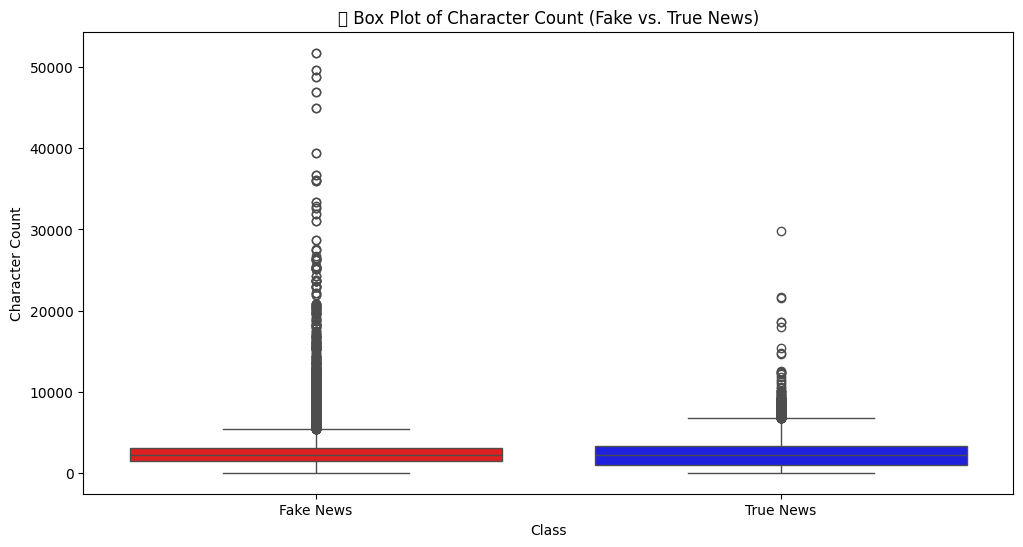

In [21]:
# Boxplot for Word Count - Fake vs. True News
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_cleaned['label'], y=data_cleaned['word_count'], palette=["red", "blue"])
plt.xticks([0, 1], ['Fake News', 'True News'])
plt.title("Box Plot of Word Count (Fake vs. True News)")
plt.xlabel("Class")
plt.ylabel("Word Count")
plt.show()

# Boxplot for Character Count - Fake vs. True News
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_cleaned['label'], y=data_cleaned['char_count'], palette=["red", "blue"])
plt.xticks([0, 1], ['Fake News', 'True News'])
plt.title("Box Plot of Character Count (Fake vs. True News)")
plt.xlabel("Class")
plt.ylabel("Character Count")
plt.show()


In [22]:
# View top 5 longest & shortest articles by word count
print("Longest Articles by Word Count:")
print(data_cleaned.nlargest(5, 'word_count')[['title', 'word_count', 'char_count']])

print("\nShortest Articles by Word Count:")
print(data_cleaned.nsmallest(5, 'word_count')[['title', 'word_count', 'char_count']])


Longest Articles by Word Count:
                                                   title  word_count  \
43720  MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...        8135   
44503  MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...        8135   
43395  The Las Vegas Mass Shooting – More to the Stor...        7928   
44178  The Las Vegas Mass Shooting – More to the Stor...        7928   
43923  CULT CRIMES, MASS SHOOTINGS & MEDIA MIND CONTR...        7209   

       char_count  
43720       51794  
44503       51794  
43395       48835  
44178       48835  
43923       44926  

Shortest Articles by Word Count:
                                                   title  word_count  \
8970                      Graphic: Supreme Court roundup           0   
32340  TAKE OUR POLL: Who Do You Think President Trum...           0   
32458  Joe Scarborough BERATES Mika Brzezinski Over “...           0   
32607  WATCH TUCKER CARLSON Scorch Sanctuary City May...           0   
32642  MAYOR OF SANCT

##### Note: Insights from Outlier Analysis              1.From my inspection of the longest and shortest articles, i observe:

##### Longest Articles (8,000+ words, 50,000+ characters)                            These articles are exceptionally long and might be valid investigative pieces rather than spam.
##### However, having articles this long could skew our model since most news articles are much shorter.
##### If needed, we can cap the length at a reasonable upper limit (e.g., 2,500-3,000 words).
##### Shortest Articles (0 words, 1 character)
##### Some articles have no text at all or contain just one character.
##### These are clear anomalies and should be removed from our dataset.

### Outlier Handling

In [23]:
# Remove only articles with 0 word count or 1 character
data_cleaned = data_cleaned[(data_cleaned['word_count'] > 0) & (data_cleaned['char_count'] > 1)]

# Confirm the dataset shape after removal
print(f" Dataset Shape After Removing Empty Articles: {data_cleaned.shape}")

# Check if any extremely short articles remain
print("\n Checking for any remaining empty or extremely short articles:")
print(data_cleaned[(data_cleaned['word_count'] == 0) | (data_cleaned['char_count'] <= 1)])


 Dataset Shape After Removing Empty Articles: (44267, 7)

 Checking for any remaining empty or extremely short articles:
Empty DataFrame
Columns: [title, text, subject, date, label, word_count, char_count]
Index: []


##### Note: Removing only empty or extremely short articles now  ensures that i am keeping useful data while avoiding noisy, irrelevant entries.

In [24]:
# Save the cleaned dataset to a CSV file
data_cleaned.to_csv("cleaned_data_after_short_articles_removal.csv", index=False)

print("Cleaned dataset saved successfully as 'cleaned_data_after_short_articles_removal.csv'.")


Cleaned dataset saved successfully as 'cleaned_data_after_short_articles_removal.csv'.


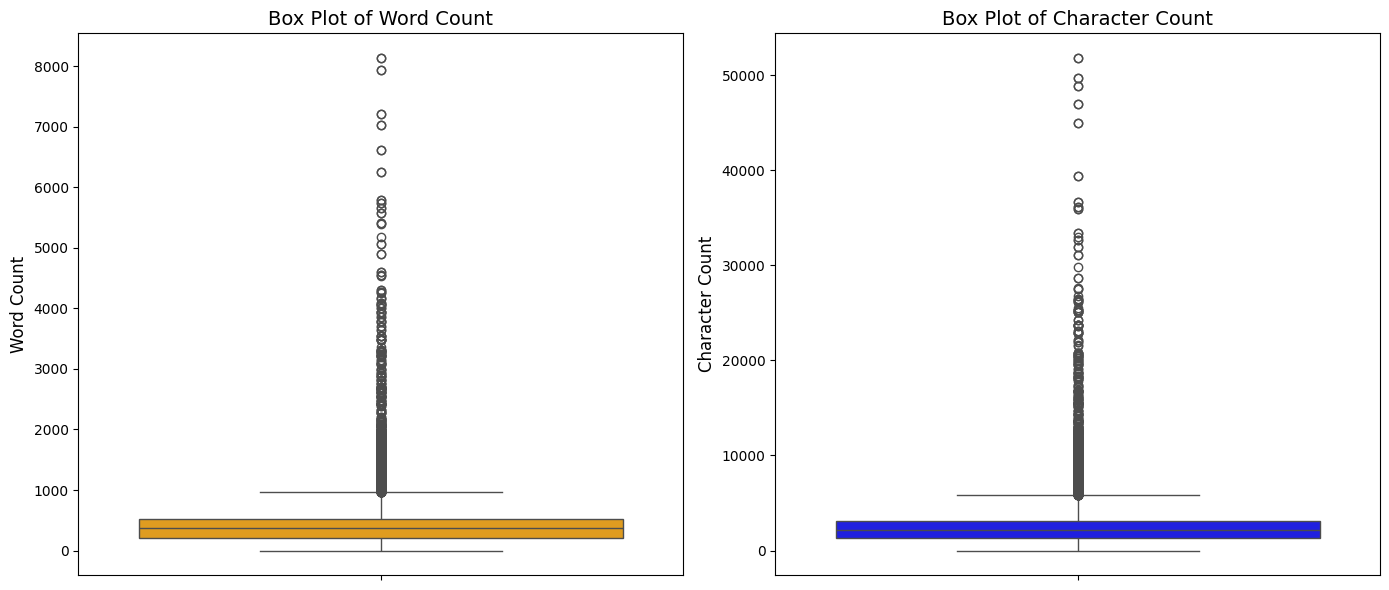

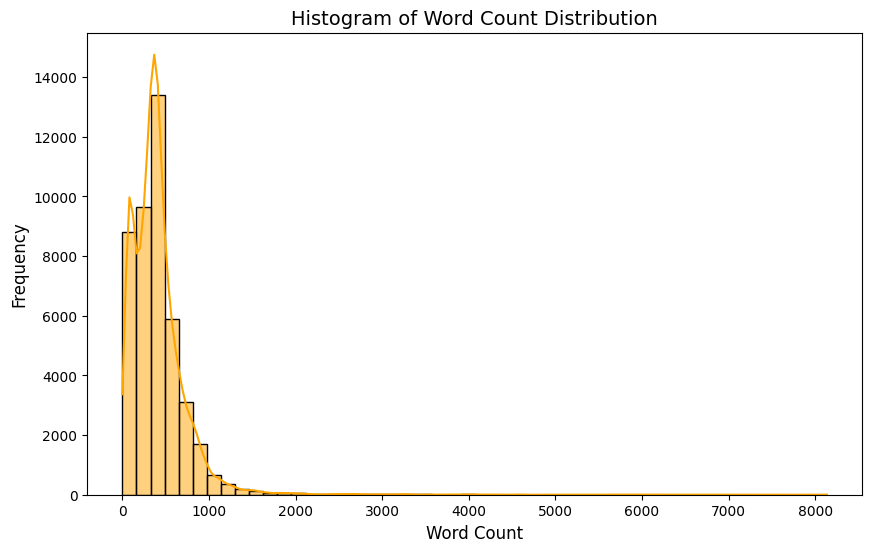

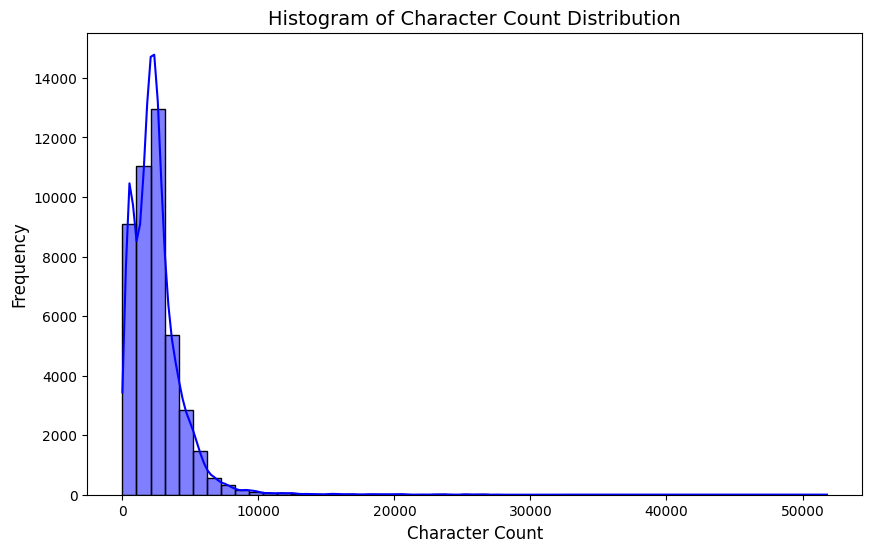

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots for Word Count and Character Count
plt.figure(figsize=(14, 6))

# Box Plot for Word Count
plt.subplot(1, 2, 1)
sns.boxplot(y=data_cleaned['word_count'], color='orange')
plt.title("Box Plot of Word Count", fontsize=14)
plt.ylabel("Word Count", fontsize=12)

# Box Plot for Character Count
plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['char_count'], color='blue')
plt.title("Box Plot of Character Count", fontsize=14)
plt.ylabel("Character Count", fontsize=12)

plt.tight_layout()
plt.savefig("box_plots.png", dpi=300, bbox_inches='tight')  # Save Box Plots in the same folder
plt.show()

# Histogram for Word Count
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['word_count'], bins=50, kde=True, color='orange')
plt.title("Histogram of Word Count Distribution", fontsize=14)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.savefig("histogram_word_count.png", dpi=300, bbox_inches='tight')  # Save Word Count Histogram
plt.show()

# Histogram for Character Count
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['char_count'], bins=50, kde=True, color='blue')
plt.title("Histogram of Character Count Distribution", fontsize=14)
plt.xlabel("Character Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.savefig("histogram_char_count.png", dpi=300, bbox_inches='tight')  # Save Character Count Histogram
plt.show()



##### Note: The box plots and histograms showed a high concentration of data near lower values, with significant outliers at higher ranges.
##### Observations like:
##### Longest article has over 8,000 words and 50,000 characters.(retain them for now to avoid losing critical information, we'll move forward with further text preprocessing. )
##### Shortest articles have zero or minimal word/character counts (already removed).

## Text Cleaning

In [26]:
import re
import string
from bs4 import BeautifulSoup
import spacy
import contractions

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  # Disabling parser & NER for efficiency

# Function for text cleaning
def clean_text(text):
    if not isinstance(text, str):  # Ensure input is string
        return ""

    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Expand contractions (e.g., "don't" → "do not")
    text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove special characters & punctuation
    text = re.sub(r"[^a-zA-Z\s]", '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply text cleaning
data_cleaned['text_cleaned'] = data_cleaned['text'].apply(clean_text)

print("Basic Text Cleaning Completed!")

# Sample before and after
print("\nSample Before Cleaning:\n", data_cleaned['text'].iloc[0])
print("\nSample After Cleaning:\n", data_cleaned['text_cleaned'].iloc[0])

# Save the cleaned dataset for future use
data_cleaned.to_csv("cleaned_data_after_text_cleaning.csv", index=False)
print("Cleaned data saved successfully!")


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/758428043.py:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/758428043.py:16: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Basic Text Cleaning Completed!

Sample Before Cleaning:
 WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense 

In [8]:
import pandas as pd

file_path = "/Users/kanchankukreti/Desktop/Dessertation/Fake New Detection project/cleaned_data_after_text_cleaning.csv"

data_cleaned = pd.read_csv(file_path)
print(f"Dataset loaded successfully! Shape: {data_cleaned.shape}")


Dataset loaded successfully! Shape: (44267, 8)


#### Check class distribution BEFORE removing NaN values

In [9]:

# Check class distribution BEFORE removing NaN values
class_before = data_cleaned['label'].value_counts()
print("Class Distribution BEFORE Removing NaN Values:\n", class_before)


Class Distribution BEFORE Removing NaN Values:
 label
0    22851
1    21416
Name: count, dtype: int64


In [30]:
# Check for missing values
missing_values = data_cleaned['text_cleaned'].isnull().sum()
print(f"Missing Values in 'text_cleaned': {missing_values}")

# Check for non-string data types
non_string_types = data_cleaned['text_cleaned'].apply(lambda x: not isinstance(x, str)).sum()
print(f"Non-String Values in 'text_cleaned': {non_string_types}")

# Display examples of non-string values
if non_string_types > 0:
    print("\nExamples of Non-String Values in 'text_cleaned':")
    print(data_cleaned.loc[data_cleaned['text_cleaned'].apply(lambda x: not isinstance(x, str)), 'text_cleaned'].head())


Missing Values in 'text_cleaned': 84
Non-String Values in 'text_cleaned': 84

Examples of Non-String Values in 'text_cleaned':
30774    NaN
32659    NaN
32689    NaN
32691    NaN
32707    NaN
Name: text_cleaned, dtype: object


##### Handling Missing Values in `text_cleaned`

##### After applying text preprocessing, we noticed that 84 rows in `text_cleaned` have missing values (`NaN`). This issue likely occurred due to:
##### 1. Removal of all special characters, URLs, or HTML elements, leaving an empty string.
##### 2. Data corruption during transformation, resulting in NaN values.

##### We will handle this issue by **removing rows where `text_cleaned` is missing** before proceeding with lemmatization. 


### Handling the missing values

In [31]:
# Remove rows where 'text_cleaned' is missing or empty
data_cleaned = data_cleaned.dropna(subset=['text_cleaned'])

# Save the cleaned dataset
data_cleaned.to_csv("cleaned_data_no_missing_text.csv", index=False)
print(f"Cleaned dataset saved! New shape: {data_cleaned.shape}")


Cleaned dataset saved! New shape: (44183, 8)


In [32]:
print(f"Missing Values in 'text_cleaned' after removal: {data_cleaned['text_cleaned'].isnull().sum()}")


Missing Values in 'text_cleaned' after removal: 0


### Check class distribution AFTER removing NaN values

In [11]:
# Check class distribution AFTER removing NaN values
class_after = data_cleaned['label'].value_counts()
print("\nClass Distribution AFTER Removing NaN Values:\n", class_after)


Class Distribution AFTER Removing NaN Values:
 label
0    22851
1    21416
Name: count, dtype: int64


##### As we disscussed earlier, during text preprocessing, we identified 84 missing values (NaN) in the text_cleaned column. These missing values likely resulted from the removal of special characters, URLs, or HTML elements, leaving some rows empty. Since missing values can disrupt text-based analysis, we removed these rows to maintain data quality.

##### To ensure that the dataset remains balanced, we compared the class distribution before and after removing these missing values:

##### The class distribution remained almost unchanged, confirming that the removal did not introduce bias into the dataset.
###### The True News class (1) remained completely unaffected.
###### The Fake News class (0) saw a slight decrease (84 rows removed), which is expected since missing values were randomly distributed.
###### After confirming that no significant class imbalance was introduced, we saved the final cleaned dataset.

##### This cleaned dataset will now be used for further analysis. 

## Text Lemmatization & Stopword Removal

In [35]:
import spacy
import pandas as pd

# Load the latest cleaned dataset
data_cleaned = pd.read_csv("cleaned_data_no_missing_text.csv")

# Load spaCy model (disabling unneeded components to improve speed)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Function for batch lemmatization & stopword removal (Optimized)
def batch_lemmatization(texts):
    results = []
    for doc in nlp.pipe(texts.astype(str), batch_size=200, n_process=4):  # Convert texts to string to avoid errors
        results.append(" ".join([token.lemma_ for token in doc if not token.is_stop]))  
    return results

#  **Save Before Lemmatization Dataset**
data_cleaned_before = data_cleaned.copy()
data_cleaned_before.to_csv("before_lemmatization.csv", index=False)
print("Before Lemmatization Dataset Saved as 'before_lemmatization.csv'")

#  **Apply optimized lemmatization**
print(" Applying Lemmatization (Optimized)... Please wait...")
data_cleaned['text_lemmatized'] = batch_lemmatization(data_cleaned['text_cleaned'])

# **Display Sample Before & After**
print("\nSample Before Lemmatization:\n", data_cleaned_before['text_cleaned'].iloc[0])
print("\nSample After Lemmatization:\n", data_cleaned['text_lemmatized'].iloc[0])

#  **Save After Lemmatization Dataset**
data_cleaned.to_csv("cleaned_data_after_lemmatization.csv", index=False)
print(" After Lemmatization Dataset Saved as 'cleaned_data_after_lemmatization.csv'")


Before Lemmatization Dataset Saved as 'before_lemmatization.csv'
 Applying Lemmatization (Optimized)... Please wait...


/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, current


Sample Before Lemmatization:
 washington reuters the head of a conservative republican faction in the yous congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in in keeping with a sharp pivot under way among republicans yous representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support educat

## Linguistic Feature Engineering

### Punctuation & Capital Letter Density

In [42]:
# Function to calculate punctuation and capital letter density
def punctuation_density(text):
    return sum(1 for char in text if char in string.punctuation) / len(text) if len(text) > 0 else 0

def capital_density(text):
    return sum(1 for char in text if char.isupper()) / len(text) if len(text) > 0 else 0

# Apply to dataset
data_cleaned['punctuation_density'] = data_cleaned['text_lemmatized'].apply(punctuation_density)
data_cleaned['capital_density'] = data_cleaned['text_lemmatized'].apply(capital_density)

# Display summary
print("Punctuation & Capital Density Computed!")

# Visualize Distributions
plt.figure(figsize=(14, 6))

# Punctuation Density Histogram
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['punctuation_density'], bins=30, kde=True, color='orange')
plt.title("Punctuation Density Distribution", fontsize=14)
plt.xlabel("Punctuation Density", fontsize=12)

# Capitalization Density Histogram
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['capital_density'], bins=30, kde=True, color='blue')
plt.title("Capitalization Density Distribution", fontsize=14)
plt.xlabel("Capitalization Density", fontsize=12)

plt.tight_layout()
plt.show()




Punctuation & Capital Density Computed!
       punctuation_density  capital_density
count         4.418300e+04          44183.0
mean          4.938991e-07              0.0
std           2.263351e-05              0.0
min           0.000000e+00              0.0
25%           0.000000e+00              0.0
50%           0.000000e+00              0.0
75%           0.000000e+00              0.0
max           1.960784e-03              0.0
Saved: 'data_with_punctuation_capital_density.csv'


### Readability Scores

Readability Scores Computed!


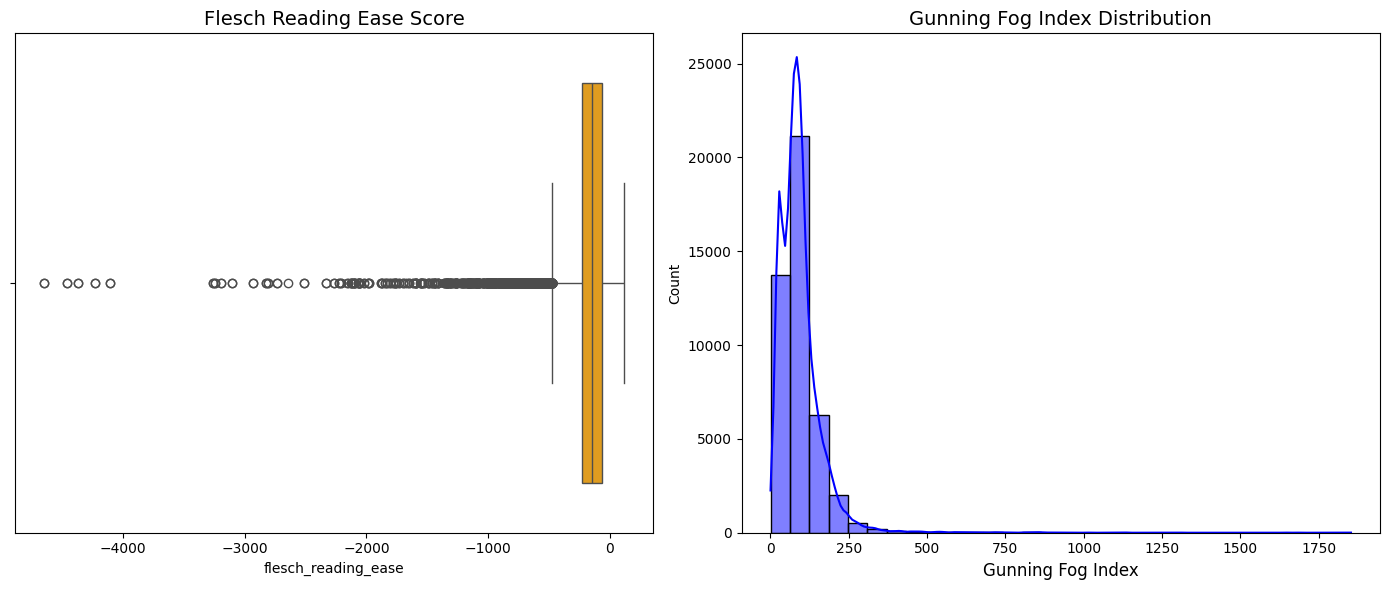

Readability Scores Plot Saved as 'readability_scores_plot.png' 🎉


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import textstat

# Function to compute readability scores
def flesch_reading(text):
    return textstat.flesch_reading_ease(text) if len(text) > 0 else 0

def gunning_fog(text):
    return textstat.gunning_fog(text) if len(text) > 0 else 0

# Apply readability calculations
data_cleaned['flesch_reading_ease'] = data_cleaned['text_lemmatized'].apply(flesch_reading)
data_cleaned['gunning_fog'] = data_cleaned['text_lemmatized'].apply(gunning_fog)

# Display summary
print("Readability Scores Computed!")

# Save and Display Readability Visualizations
plt.figure(figsize=(14, 6))

# Flesch Reading Ease Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=data_cleaned['flesch_reading_ease'], color="orange")
plt.title("Flesch Reading Ease Score", fontsize=14)

# Gunning Fog Index Histogram
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['gunning_fog'], bins=30, kde=True, color="blue")
plt.title("Gunning Fog Index Distribution", fontsize=14)
plt.xlabel("Gunning Fog Index", fontsize=12)

plt.tight_layout()

# Save the plot as an image file
plt.savefig("readability_scores_plot.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print("Readability Scores Plot Saved as 'readability_scores_plot.png' )


## Word Cloud & Keyword Analysis

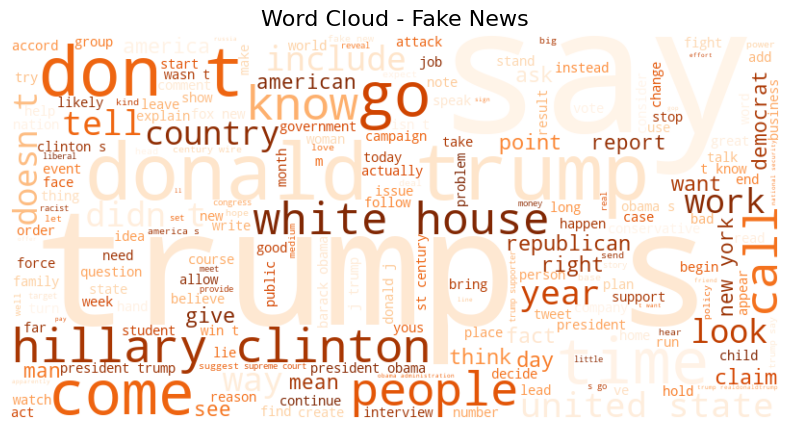

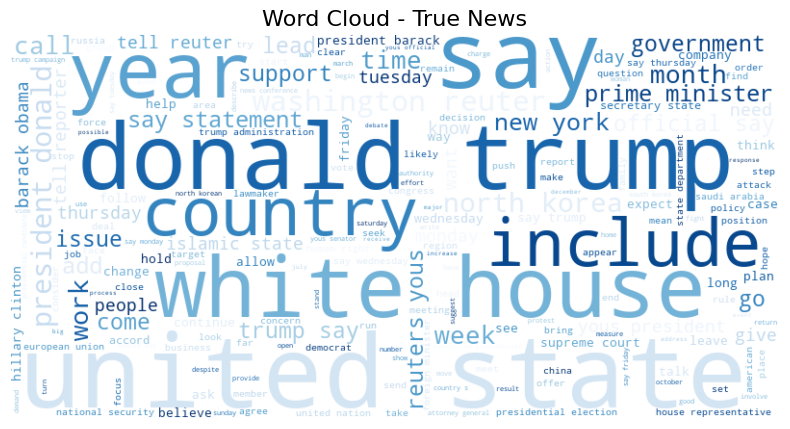

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/957718430.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fake_keywords_df, x='Frequency', y='Word', palette='Oranges_r')


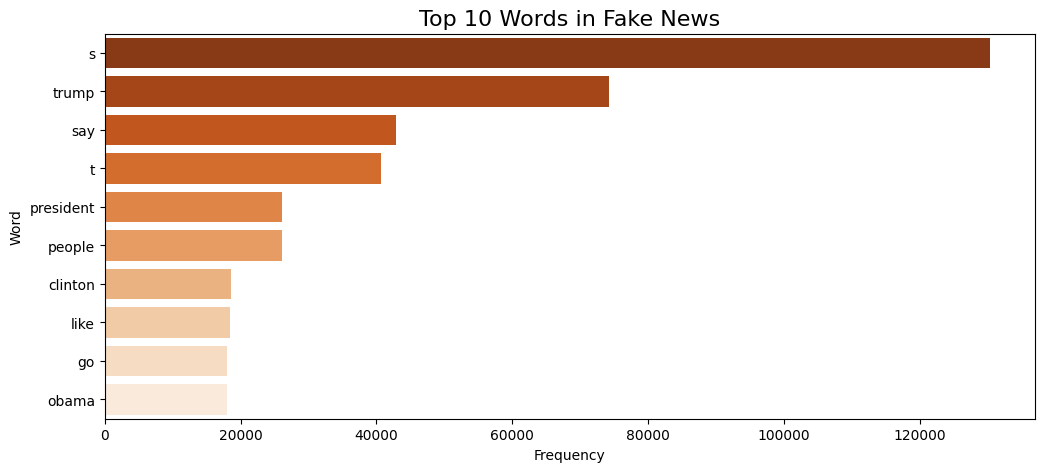

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/957718430.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=true_keywords_df, x='Frequency', y='Word', palette='Blues_r')


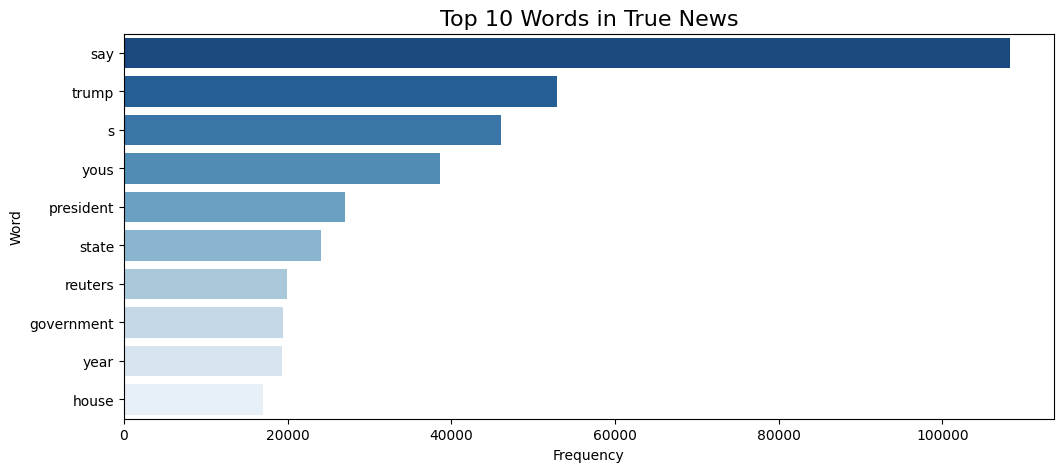

In [66]:
import os

# Ensure the output directory exists
os.makedirs("outputs/visualizations", exist_ok=True)

# Generate word clouds and save images
def generate_wordcloud(text_series, title, color, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(" ".join(text_series))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    
    # Save the plot as an image
    filepath = f"outputs/visualizations/{filename}.png"
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

# Generate & Save Word Clouds
generate_wordcloud(data_cleaned[data_cleaned['label'] == 0]['text_lemmatized'], "Word Cloud - Fake News", "Oranges", "word_cloud_fake_news")
generate_wordcloud(data_cleaned[data_cleaned['label'] == 1]['text_lemmatized'], "Word Cloud - True News", "Blues", "word_cloud_true_news")


# Save Fake News Top Words Bar Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=fake_keywords_df, x='Frequency', y='Word', palette='Oranges_r')
plt.title("Top 10 Words in Fake News", fontsize=16)

# Save plot as image
plt.savefig("outputs/visualizations/top_words_fake_news.png", dpi=300, bbox_inches='tight')
plt.show()

# Save True News Top Words Bar Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=true_keywords_df, x='Frequency', y='Word', palette='Blues_r')
plt.title("Top 10 Words in True News", fontsize=16)

# Save plot as image
plt.savefig("outputs/visualizations/top_words_true_news.png", dpi=300, bbox_inches='tight')
plt.show()



## Sentiment Analysis

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/3817066186.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='sentiment', data=data_cleaned, palette=['orange', 'blue'])
/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/3817066186.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='sentiment', data=data_cleaned, palette=['orange', 'blue'], split=True)


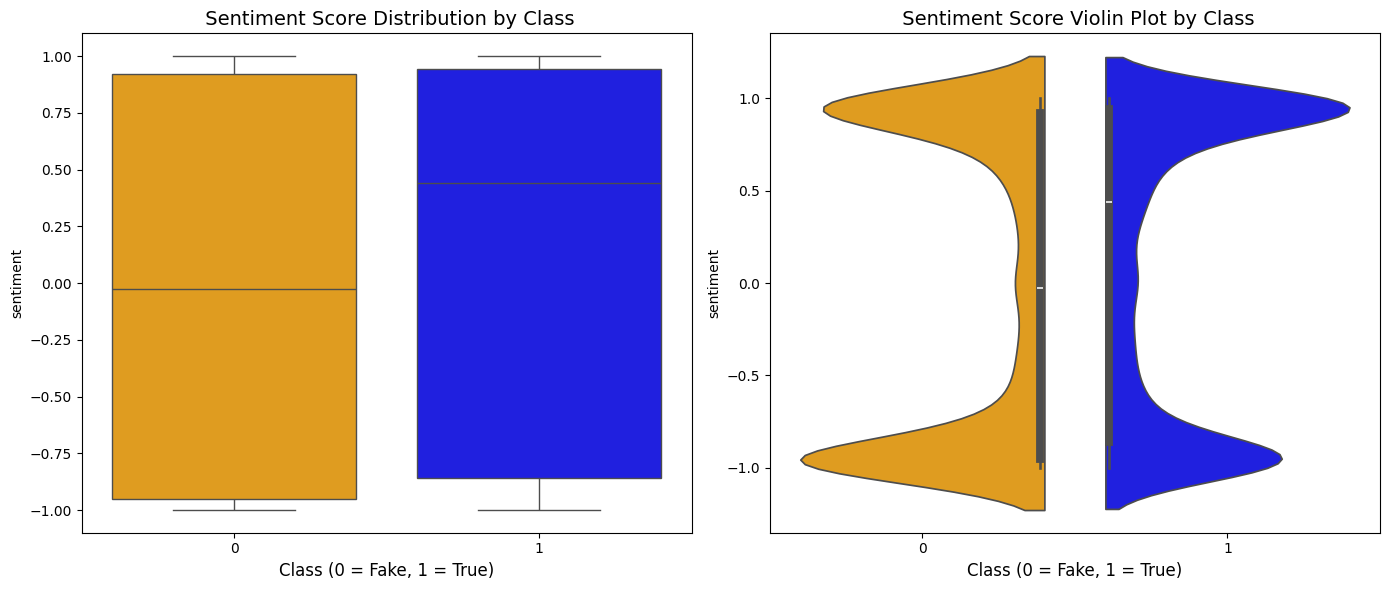

In [59]:
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Compute Sentiment Scores
data_cleaned['sentiment'] = data_cleaned['text_lemmatized'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualizing Sentiment Score Distribution
plt.figure(figsize=(14, 6))

# Boxplot for Sentiment Score
plt.subplot(1, 2, 1)
sns.boxplot(x='label', y='sentiment', data=data_cleaned, palette=['orange', 'blue'])
plt.title(" Sentiment Score Distribution by Class", fontsize=14)
plt.xlabel("Class (0 = Fake, 1 = True)", fontsize=12)
plt.savefig("outputs/visualizations/sentiment_score_distribution.png", dpi=300, bbox_inches='tight')

# Violin Plot for Sentiment Score
plt.subplot(1, 2, 2)
sns.violinplot(x='label', y='sentiment', data=data_cleaned, palette=['orange', 'blue'], split=True)
plt.title(" Sentiment Score Violin Plot by Class", fontsize=14)
plt.xlabel("Class (0 = Fake, 1 = True)", fontsize=12)
plt.savefig("outputs/visualizations/sentiment_violin_plot.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()






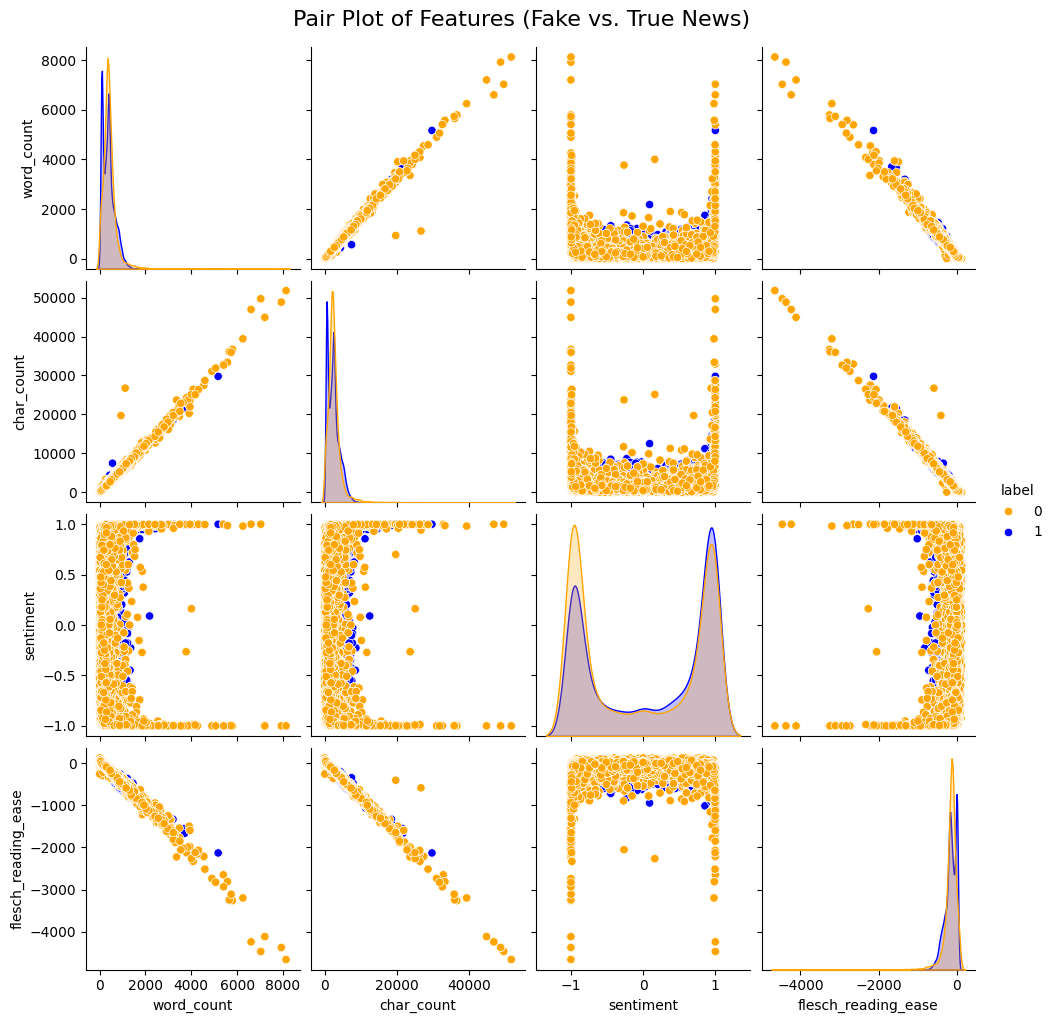

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for pair plot
subset = data_cleaned[['word_count', 'char_count', 'sentiment', 'flesch_reading_ease', 'label']]

# Pair plot using Seaborn
pairplot = sns.pairplot(subset, hue='label', palette=['orange', 'blue'])
pairplot.fig.suptitle("Pair Plot of Features (Fake vs. True News)", y=1.02, fontsize=16)

# Save the Pair Plot before plt.show()
pairplot.savefig("outputs/visualizations/pair_plot_features.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## Named Entity Recognition (NER)

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/2482321209.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=fake_entities.index, x=fake_entities.values, palette='Oranges_r')


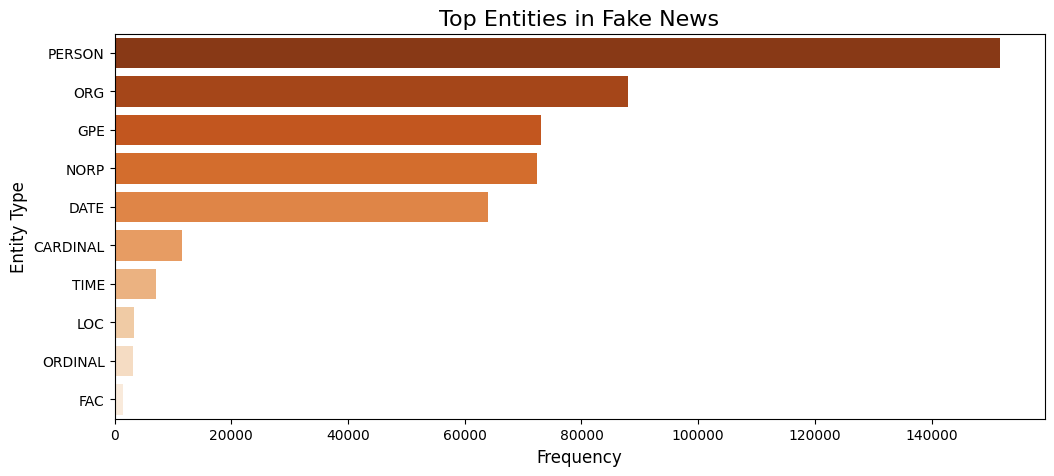

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/2482321209.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=true_entities.index, x=true_entities.values, palette='Blues_r')


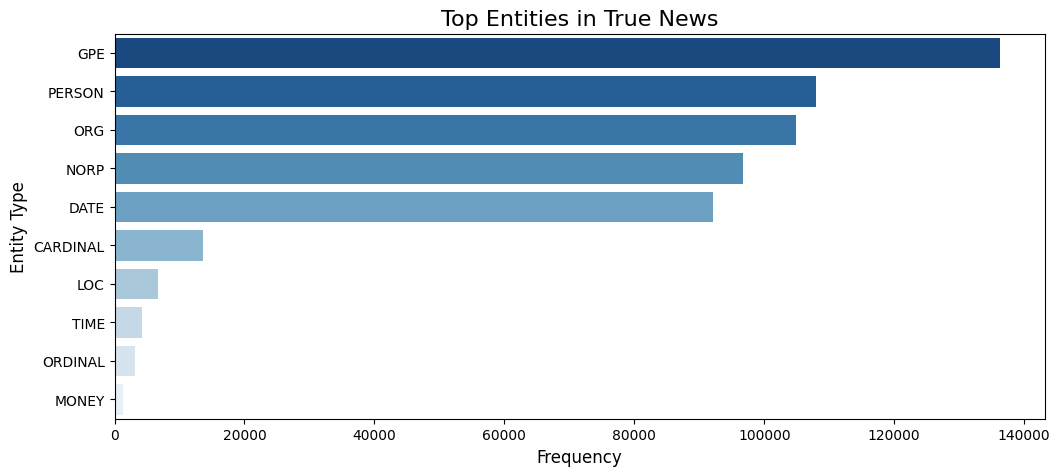

In [67]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy Model
nlp = spacy.load("en_core_web_sm", disable=["parser"])

# Named Entity Recognition function
def extract_entities(text):
    doc = nlp(text)
    return [ent.label_ for ent in doc.ents]

# Apply NER
data_cleaned['entities'] = data_cleaned['text_lemmatized'].apply(extract_entities)

# Entity Count by Class
fake_entities = data_cleaned[data_cleaned['label'] == 0]['entities'].explode().value_counts().head(10)
true_entities = data_cleaned[data_cleaned['label'] == 1]['entities'].explode().value_counts().head(10)

# Plot Entity Frequency - Fake News
plt.figure(figsize=(12, 5))
sns.barplot(y=fake_entities.index, x=fake_entities.values, palette='Oranges_r')
plt.title("Top Entities in Fake News", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Entity Type", fontsize=12)

# Save the plot
plt.savefig("outputs/top_entities_fake_news.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Entity Frequency - True News
plt.figure(figsize=(12, 5))
sns.barplot(y=true_entities.index, x=true_entities.values, palette='Blues_r')
plt.title("Top Entities in True News", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Entity Type", fontsize=12)

# Save the plot
plt.savefig("outputs/top_entities_true_news.png", dpi=300, bbox_inches='tight')
plt.show()


## Part of Speech (POS) Tagging

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/40782928.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=fake_pos.index, x=fake_pos.values, palette='Oranges_r')


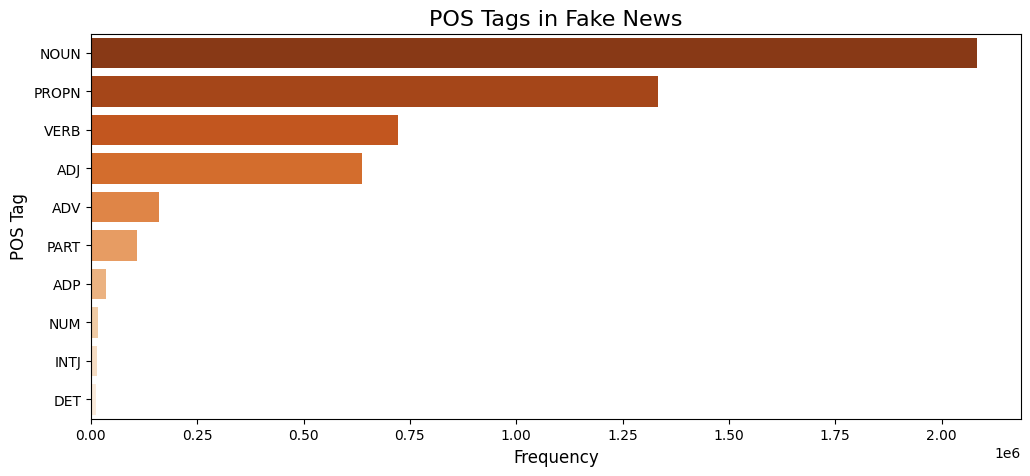

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/40782928.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=true_pos.index, x=true_pos.values, palette='Blues_r')


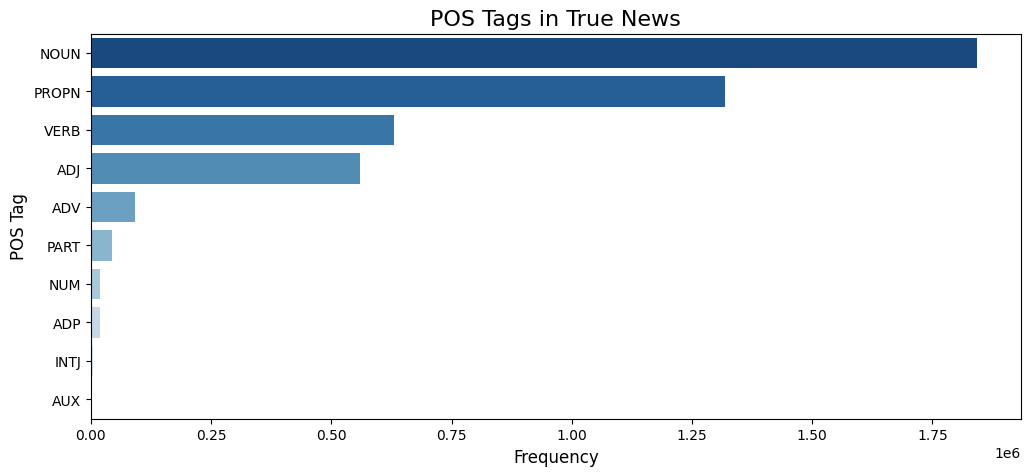

POS Tagging Plots Saved Successfully as 'pos_tags_fake_news.png' and 'pos_tags_true_news.png'!


In [68]:
# Function for POS Tagging
def pos_tags(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Apply POS Tagging
data_cleaned['pos_tags'] = data_cleaned['text_lemmatized'].apply(pos_tags)

# POS Count by Class
fake_pos = data_cleaned[data_cleaned['label'] == 0]['pos_tags'].explode().value_counts().head(10)
true_pos = data_cleaned[data_cleaned['label'] == 1]['pos_tags'].explode().value_counts().head(10)

# POS Frequency Plot for Fake News
plt.figure(figsize=(12, 5))
sns.barplot(y=fake_pos.index, x=fake_pos.values, palette='Oranges_r')
plt.title("POS Tags in Fake News", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("POS Tag", fontsize=12)

#  Save the plot
plt.savefig("pos_tags_fake_news.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

#  POS Frequency Plot for True News
plt.figure(figsize=(12, 5))
sns.barplot(y=true_pos.index, x=true_pos.values, palette='Blues_r')
plt.title("POS Tags in True News", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("POS Tag", fontsize=12)

# Save the plot
plt.savefig("pos_tags_true_news.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print("POS Tagging Plots Saved Successfully as 'pos_tags_fake_news.png' and 'pos_tags_true_news.png'!")


In [69]:
data_cleaned.to_csv("final_preprocessed_data.csv", index=False)
print("Fully Processed Dataset Saved as 'final_preprocessed_data.csv'")


Fully Processed Dataset Saved as 'final_preprocessed_data.csv'


## Heatmap & Correlation Matrix

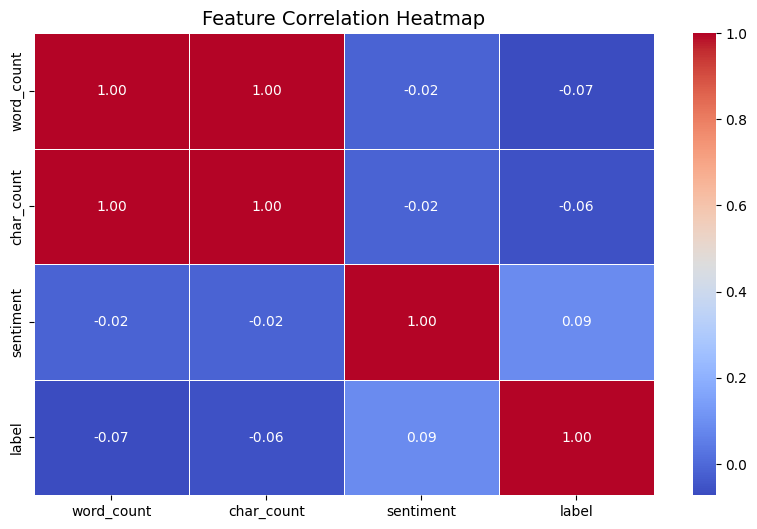

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features for correlation analysis
correlation_matrix = data_cleaned[['word_count', 'char_count', 'sentiment', 'label']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Save the heatmap
plt.savefig("feature_correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


## Co-occurrence of Keywords in Fake vs. True News

### Extract Most Common Bigrams (Word Pairs)

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/3068902781.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[f"{w1} {w2}" for w1, w2 in fake_bigrams_df['Bigram']], x=fake_bigrams_df['Frequency'], ax=axes[0], palette='Reds_r')
/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/3068902781.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[f"{w1} {w2}" for w1, w2 in true_bigrams_df['Bigram']], x=true_bigrams_df['Frequency'], ax=axes[1], palette='Blues_r')


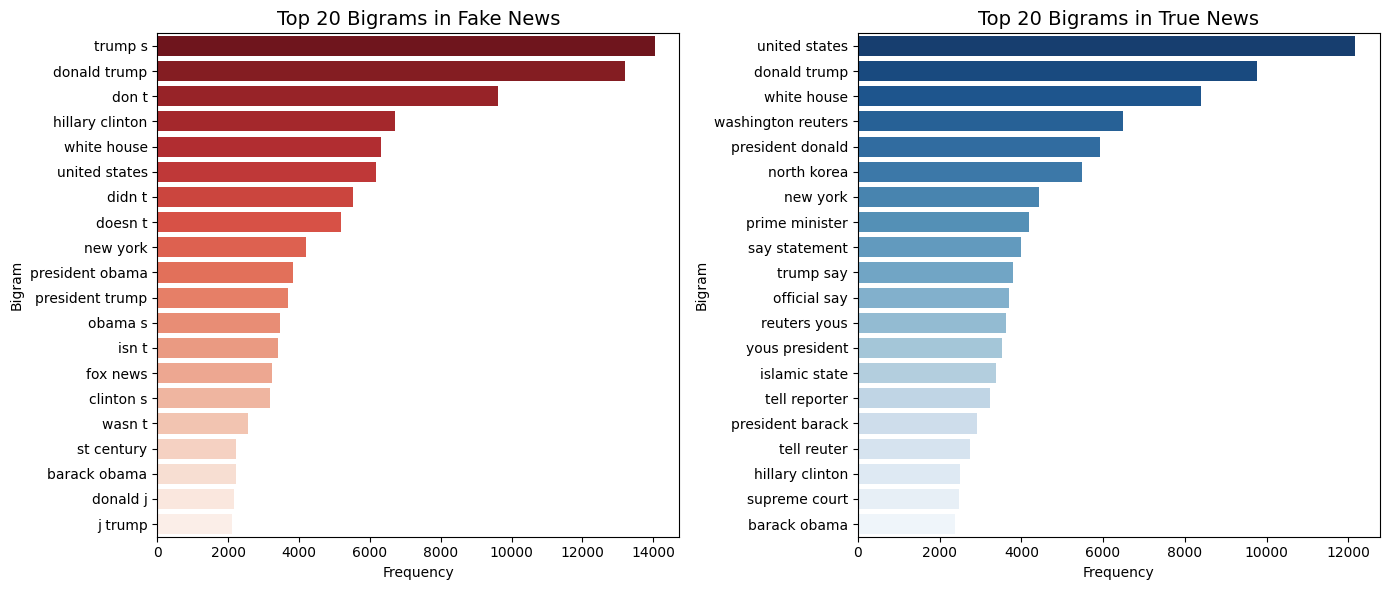

In [75]:


import itertools
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.util import bigrams

# Tokenize words for bigram analysis
data_cleaned['tokens'] = data_cleaned['text_lemmatized'].apply(lambda x: nltk.word_tokenize(x))

# Function to get most common bigrams
def get_top_bigrams(text_list, n=20):
    bigram_list = list(itertools.chain(*[list(bigrams(tokens)) for tokens in text_list]))
    return Counter(bigram_list).most_common(n)

# Get top bigrams for Fake News
fake_bigrams = get_top_bigrams(data_cleaned[data_cleaned['label'] == 0]['tokens'])

# Get top bigrams for True News
true_bigrams = get_top_bigrams(data_cleaned[data_cleaned['label'] == 1]['tokens'])

# Convert to DataFrame
fake_bigrams_df = pd.DataFrame(fake_bigrams, columns=['Bigram', 'Frequency'])
true_bigrams_df = pd.DataFrame(true_bigrams, columns=['Bigram', 'Frequency'])

# Plot Bigrams
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fake News Bigrams
sns.barplot(y=[f"{w1} {w2}" for w1, w2 in fake_bigrams_df['Bigram']], x=fake_bigrams_df['Frequency'], ax=axes[0], palette='Reds_r')
axes[0].set_title("Top 20 Bigrams in Fake News", fontsize=14)
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Bigram")

# True News Bigrams
sns.barplot(y=[f"{w1} {w2}" for w1, w2 in true_bigrams_df['Bigram']], x=true_bigrams_df['Frequency'], ax=axes[1], palette='Blues_r')
axes[1].set_title("Top 20 Bigrams in True News", fontsize=14)
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Bigram")

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("top_bigrams_fake_vs_true.png", dpi=300, bbox_inches="tight")
plt.show()


### Word Co-occurrence Network Graph

Defaulting to user installation because normal site-packages is not writeable


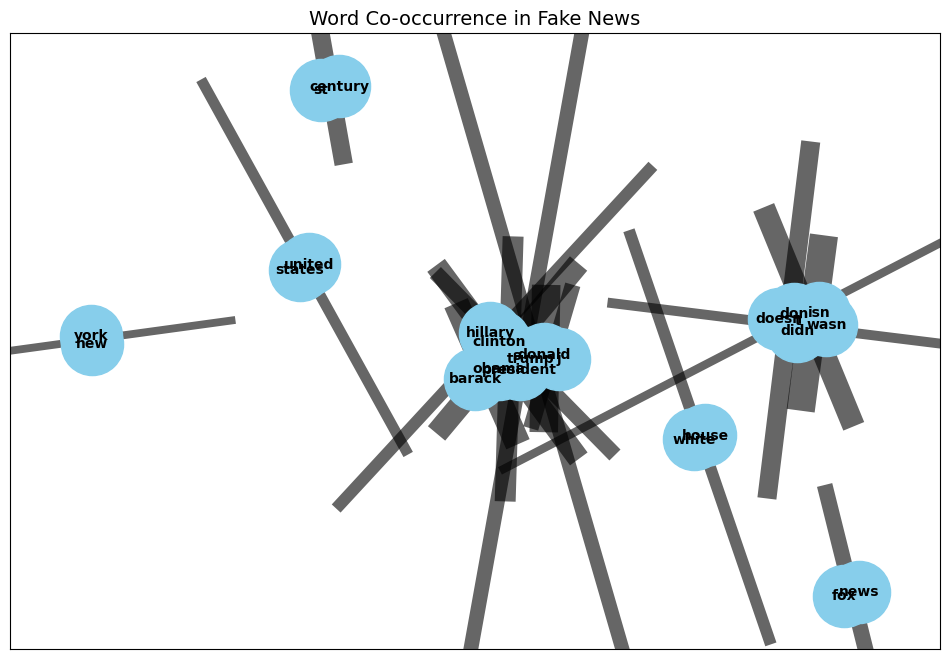

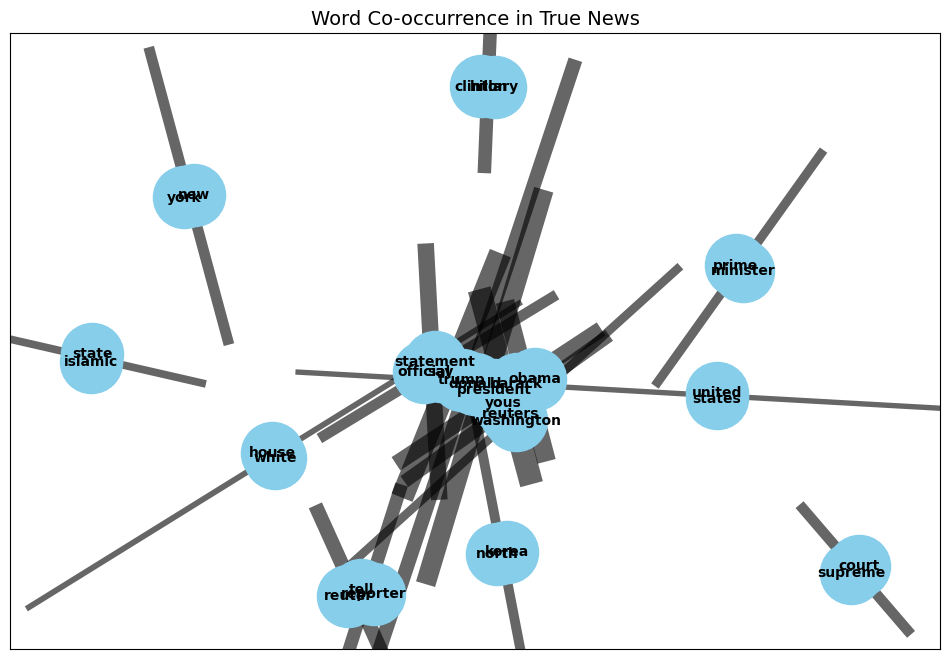

In [76]:
!pip3 install networkx
import networkx as nx

# Function to create a co-occurrence network graph
def plot_cooccurrence_graph(bigram_list, title, filename):
    G = nx.Graph()
    
    for (word1, word2), freq in bigram_list:
        G.add_edge(word1, word2, weight=freq)
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=2000)
    nx.draw_networkx_edges(G, pos, width=[d['weight'] * 0.05 for (u, v, d) in G.edges(data=True)], alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    plt.title(title, fontsize=14)
    
    # Save and show plot
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Plot co-occurrence graphs for Fake and True News
plot_cooccurrence_graph(fake_bigrams, "Word Co-occurrence in Fake News", "cooccurrence_fake_news.png")
plot_cooccurrence_graph(true_bigrams, "Word Co-occurrence in True News", "cooccurrence_true_news.png")


## Lexical & Semantic Complexity Analysis

### Lexical Diversity & Vocabulary Richness

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/608118824.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='lexical_diversity', data=data_cleaned, palette=['red', 'blue'])


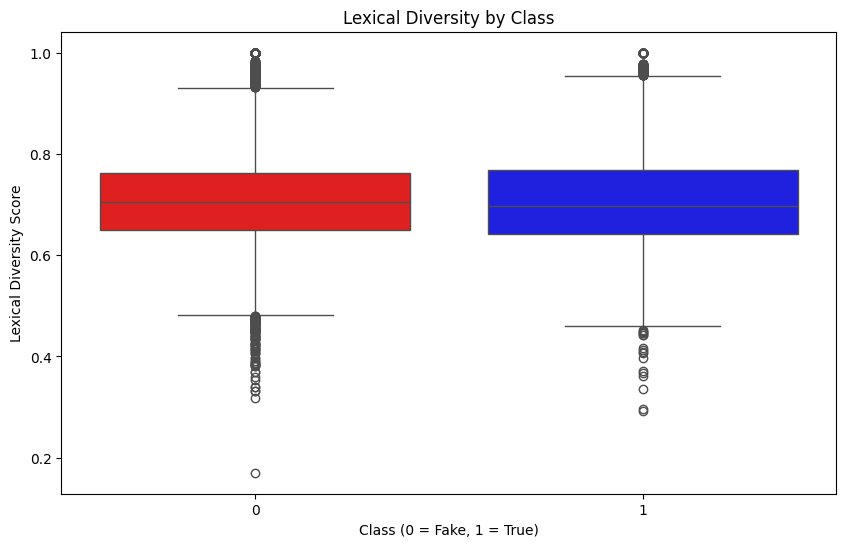

In [77]:
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

# Compute lexical diversity
data_cleaned['lexical_diversity'] = data_cleaned['text_lemmatized'].apply(lexical_diversity)

# Plot lexical diversity
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='lexical_diversity', data=data_cleaned, palette=['red', 'blue'])
plt.title("Lexical Diversity by Class")
plt.xlabel("Class (0 = Fake, 1 = True)")
plt.ylabel("Lexical Diversity Score")
plt.savefig("lexical_diversity.png", dpi=300, bbox_inches="tight")
plt.show()


## Data Leakage Check & Bias Analysis

### Class Imbalance Check

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_5054/1584857289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data_cleaned, palette=['red', 'blue'])


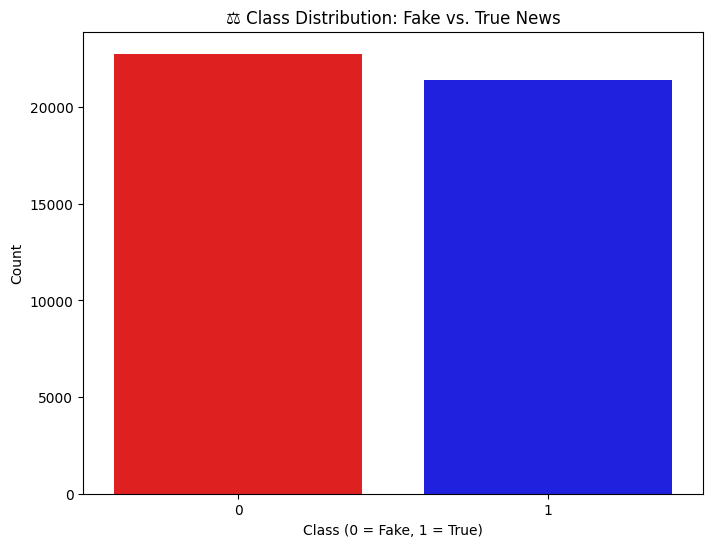

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data_cleaned, palette=['red', 'blue'])
plt.title("⚖ Class Distribution: Fake vs. True News")
plt.xlabel("Class (0 = Fake, 1 = True)")
plt.ylabel("Count")
plt.savefig("class_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


### Bias in Metadata Columns (Title, Subject, Date)

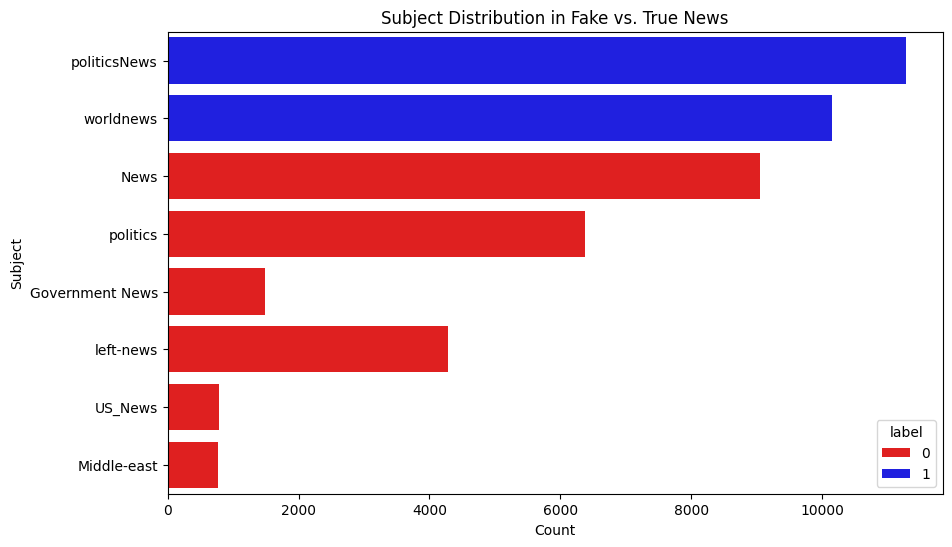

In [79]:
# Unique Subjects in Fake vs. True News
plt.figure(figsize=(10, 6))
sns.countplot(y=data_cleaned['subject'], hue=data_cleaned['label'], palette=['red', 'blue'])
plt.title("Subject Distribution in Fake vs. True News")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.savefig("subject_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


In [2]:
import pandas as pd
import os

# File path
file_path = "final_processed_news_dataset.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("File found! Proceeding to load it.")
    data_cleaned = pd.read_csv(file_path)
    print(f"Dataset loaded successfully! Shape: {data_cleaned.shape}")
else:
    print("File not found! Please check the file path or move the file to the correct directory.")


File found! Proceeding to load it.
Dataset loaded successfully! Shape: (44183, 18)


In [3]:
# Display the first few rows
print(data_cleaned.head())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  word_count  char_count  \
0  December 31, 2017       1         749        4659   
1  December 29, 2017       1         624        4077   
2  December 31, 2017       1         457        2789   
3  December 30, 20

In [4]:
data_cleaned.to_csv("loaded_dataset.csv", index=False)
print("Dataset saved as 'loaded_dataset.csv'")


Dataset saved as 'loaded_dataset.csv'


In [5]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/kanchankukreti/Desktop/Dessertation/Fake New Detection project/Notebooks


## Advanced Visualization of Feature Relationships

### Pairwise Relationships

Pairwise relationships plot saved as 'pairwise_relationships_plot.png'


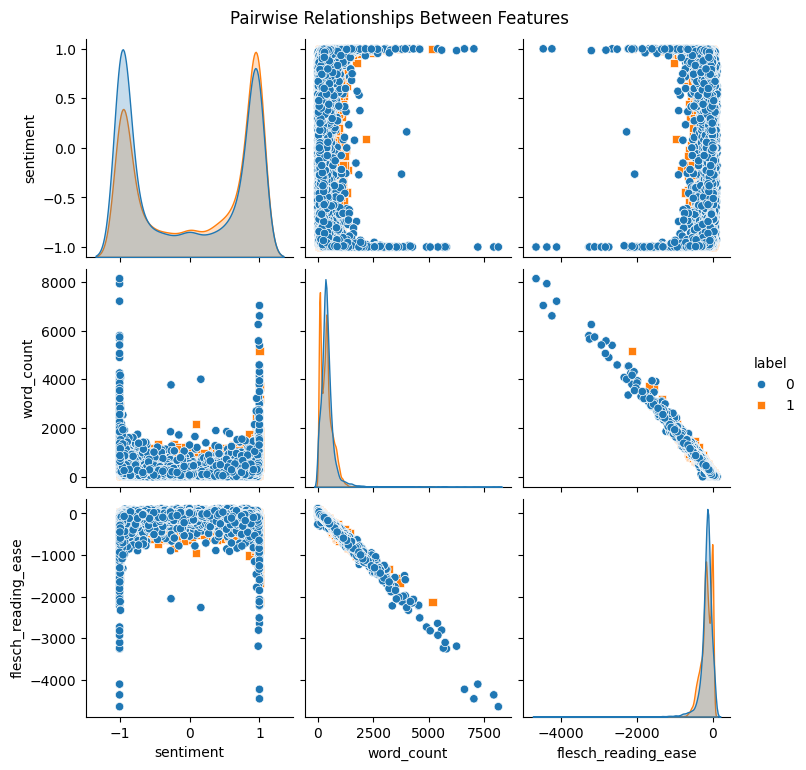

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for visualization
selected_features = ['sentiment', 'word_count', 'flesch_reading_ease', 'label']

# Pair plot
pairplot = sns.pairplot(data_cleaned[selected_features], hue='label', diag_kind='kde', markers=["o", "s"])
pairplot.fig.suptitle("Pairwise Relationships Between Features", y=1.02)

# Save the plot
pairplot.savefig("pairwise_relationships_plot.png")
print("Pairwise relationships plot saved as 'pairwise_relationships_plot.png'")

# Show the plot
plt.show()



##### Note: For this visualization, char_count was excluded due to its perfect correlation with word_count, avoiding redundancy. However, it is retained in the dataset for evaluation after EDA. Key insights include:

##### Readability: Longer texts (higher word_count) are less readable, as seen in the inverse relationship with flesch_reading_ease.
##### Sentiment Clusters: Distinct sentiment patterns (-1, 0, 1) emerge for fake vs. true news.
##### Class Separation: Readability and sentiment show some separation between fake and true news, aiding future analysis.

### Cluster Analysis with PCA

PCA clustering plot saved as 'pca_clustering_plot.png'


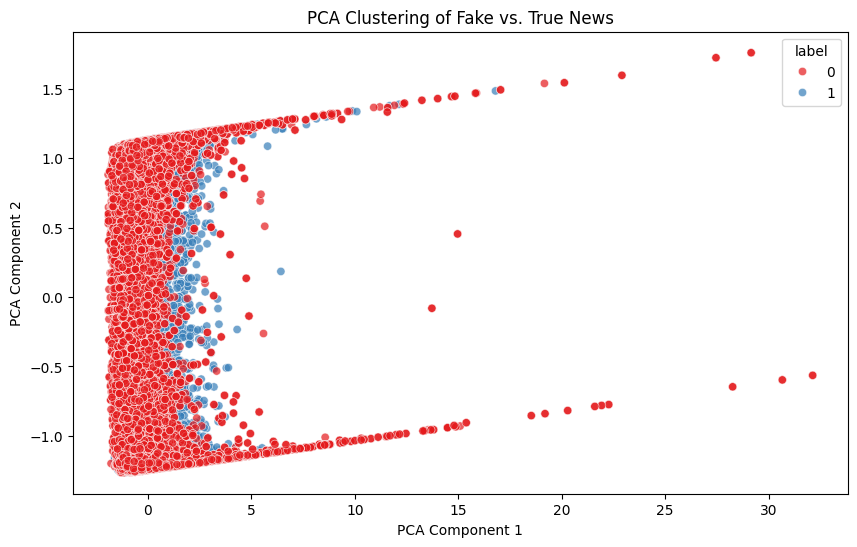

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
features = ['sentiment', 'word_count', 'flesch_reading_ease']
X = data_cleaned[features]
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add PCA results to the dataframe
data_cleaned['pca_one'] = pca_result[:, 0]
data_cleaned['pca_two'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca_one', y='pca_two', hue='label', data=data_cleaned, palette='Set1', alpha=0.7
)
plt.title("PCA Clustering of Fake vs. True News")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Save the plot
plt.savefig("pca_clustering_plot.png")
print("PCA clustering plot saved as 'pca_clustering_plot.png'")

# Show the plot
plt.show()


##### Note: Class Overlap: Fake news (label=0) and true news (label=1) show significant overlap, indicating shared characteristics between the two classes.
##### Cluster Patterns: True news tends to cluster in specific regions, but complete separability is not evident.
##### Outliers: A few points lie far from the main clusters, suggesting potential outliers or unique patterns.
##### This analysis highlights the need for advanced techniques (e.g., t-SNE) or additional features to enhance class distinction and explore latent patterns.

### t-SNE Analysis

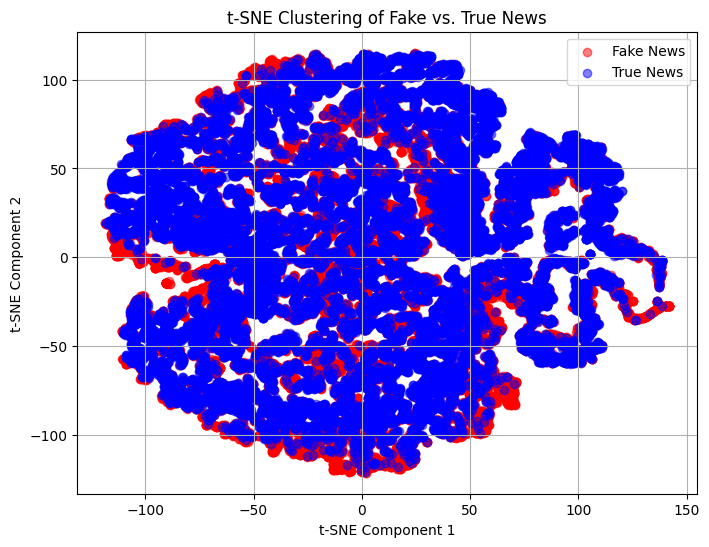

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the final processed dataset
file_path = "final_processed_news_dataset.csv"
data_cleaned = pd.read_csv(file_path)

# Select numerical features for dimensionality reduction
features = ["word_count", "flesch_reading_ease", "sentiment"]
X = data_cleaned[features]
y = data_cleaned["label"]  # Target variable (0 = Fake, 1 = True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_scaled)

# Convert to DataFrame for plotting
tsne_df = pd.DataFrame(X_embedded, columns=["TSNE1", "TSNE2"])
tsne_df["label"] = y

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df[tsne_df["label"] == 0]["TSNE1"], tsne_df[tsne_df["label"] == 0]["TSNE2"], c='red', label="Fake News", alpha=0.5)
plt.scatter(tsne_df[tsne_df["label"] == 1]["TSNE1"], tsne_df[tsne_df["label"] == 1]["TSNE2"], c='blue', label="True News", alpha=0.5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Clustering of Fake vs. True News")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("tsne_clustering_plot.png", dpi=300)
plt.show()


##### Note: Since t-SNE did not provide clear separation, we will now apply UMAP, which is more efficient for large datasets.

### UMAP for Clustering

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 23.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


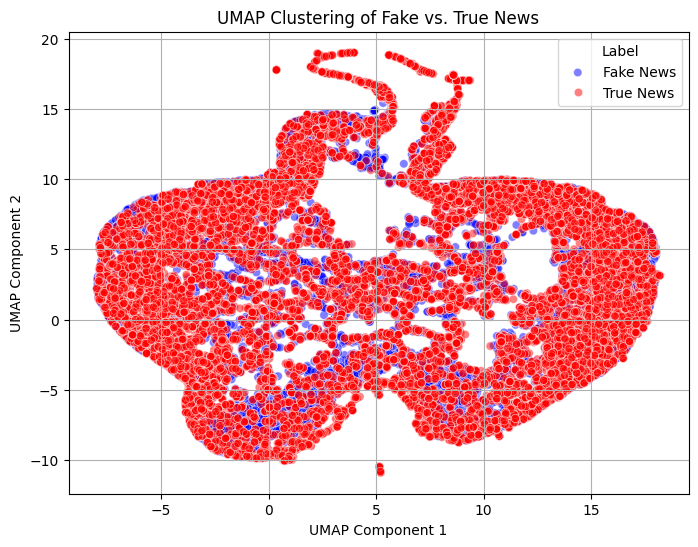

In [10]:
!pip3 install umap-learn

import umap
import seaborn as sns

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Convert to DataFrame for plotting
umap_df = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
umap_df["label"] = y

# Plot UMAP results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="label", palette={0: "red", 1: "blue"}, alpha=0.5)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Clustering of Fake vs. True News")
plt.legend(title="Label", labels=["Fake News", "True News"])
plt.grid(True)

# Save the plot
plt.savefig("umap_clustering_plot.png", dpi=300)
plt.show()


##### Note: After UMAP clustering, we observed that fake and true news do not exhibit strong separability in low-dimensional space. This suggests that simple word-based features may not be enough for classification. To gain deeper insights, we now analyze advanced linguistic markers such as readability, sentence structure, punctuation, and lexical richness to identify stylistic differences between fake and true news.



##### Note: Linguistic features such as punctuation and capital letter density were already computed. Before proceeding further, we assess their significance in differentiating fake and true news. If valuable, they will be included in our feature selection for modeling; otherwise, they may be discarded to avoid redundancy."

<!-- Why Revisit Readability Scores?

After UMAP clustering, no clear separability was observed between fake and true news, suggesting word-based features alone may be insufficient.
To refine our feature set, we now examine readability outliers to determine their impact on classification.
Key Findings:

Extreme Flesch Reading Ease and Gunning Fog Index scores highlight highly complex or anomalous texts.
Some articles show unexpectedly difficult readability, possibly due to long sentences, jargon, or unnatural structures.
These extreme values may distort feature importance, requiring evaluation for retention, transformation, or removal. -->

### Readability Score Outliers After UMAP Clustering

###### Why Revisit Readability Scores?

###### After UMAP clustering, no clear separability was observed between fake and true news, suggesting word-based features alone may be insufficient.
###### To refine our feature set, we now examine readability outliers to determine their impact on classification.
###### Key Findings:

###### Extreme Flesch Reading Ease and Gunning Fog Index scores highlight highly complex or anomalous texts.
###### Some articles show unexpectedly difficult readability, possibly due to long sentences, jargon, or unnatural structures.
###### These extreme values may distort feature importance, requiring evaluation for retention, transformation, or removal.

## Investigating Readability Score Outliers


In [4]:
import pandas as pd

# Load the latest dataset
file_path = "final_processed_news_dataset.csv"
data = pd.read_csv(file_path)

# Define threshold for detecting outliers
def detect_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify outliers in readability scores
flesch_outliers = detect_outliers(data, 'flesch_reading_ease')
fog_outliers = detect_outliers(data, 'gunning_fog')

print(f"Outliers in Flesch Reading Ease Score: {len(flesch_outliers)}")
print(f"Outliers in Gunning Fog Index: {len(fog_outliers)}")

# Display some example outliers
print("\n Example Outliers in Flesch Reading Ease Score:")
print(flesch_outliers[['text_cleaned', 'flesch_reading_ease']].head())

print("\nExample Outliers in Gunning Fog Index:")
print(fog_outliers[['text_cleaned', 'gunning_fog']].head())

# Save outlier data for review
flesch_outliers.to_csv("flesch_outliers.csv", index=False)
fog_outliers.to_csv("gunning_fog_outliers.csv", index=False)
print("\nOutlier data saved for review.")


Outliers in Flesch Reading Ease Score: 1854
Outliers in Gunning Fog Index: 1913

 Example Outliers in Flesch Reading Ease Score:
                                         text_cleaned  flesch_reading_ease
34  king of prussia pennsylvaniawashington reuters...              -541.60
51  washington reuters the republicancontrolled yo...              -475.28
66  atlanta reuters the two democratic candidates ...              -672.53
71  reuters the yous house of representatives gave...              -539.91
85  reuters the republicancontrolled yous house of...              -572.38

Example Outliers in Gunning Fog Index:
                                         text_cleaned  gunning_fog
34  king of prussia pennsylvaniawashington reuters...       236.51
51  washington reuters the republicancontrolled yo...       214.09
66  atlanta reuters the two democratic candidates ...       288.23
71  reuters the yous house of representatives gave...       232.87
85  reuters the republicancontrolled yous hous

# Investigating Readability Score Outliers
Readability outliers were identified in both Flesch Reading Ease and Gunning Fog Index. These extreme values may indicate complex or manipulated language styles in news articles. 
Instead of outright removal, we will explore transformation methods and further assess their distribution across fake and true news.


### Visualizing Readability Score Distributions

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_2591/920364533.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['label'], y=data['flesch_reading_ease'], palette=["red", "blue"])
/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_2591/920364533.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['label'], y=data['gunning_fog'], palette=["red", "blue"])


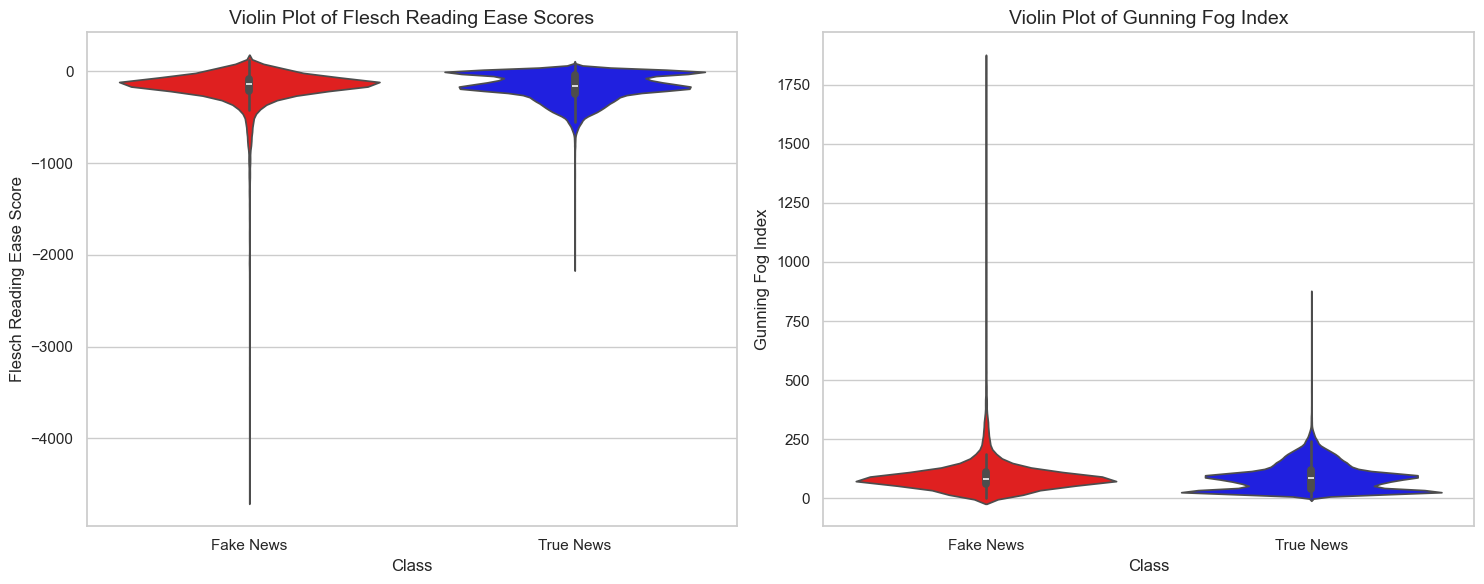

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_2591/920364533.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['label'], y=data['flesch_reading_ease'], palette=["red", "blue"])
/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_2591/920364533.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['label'], y=data['gunning_fog'], palette=["red", "blue"])


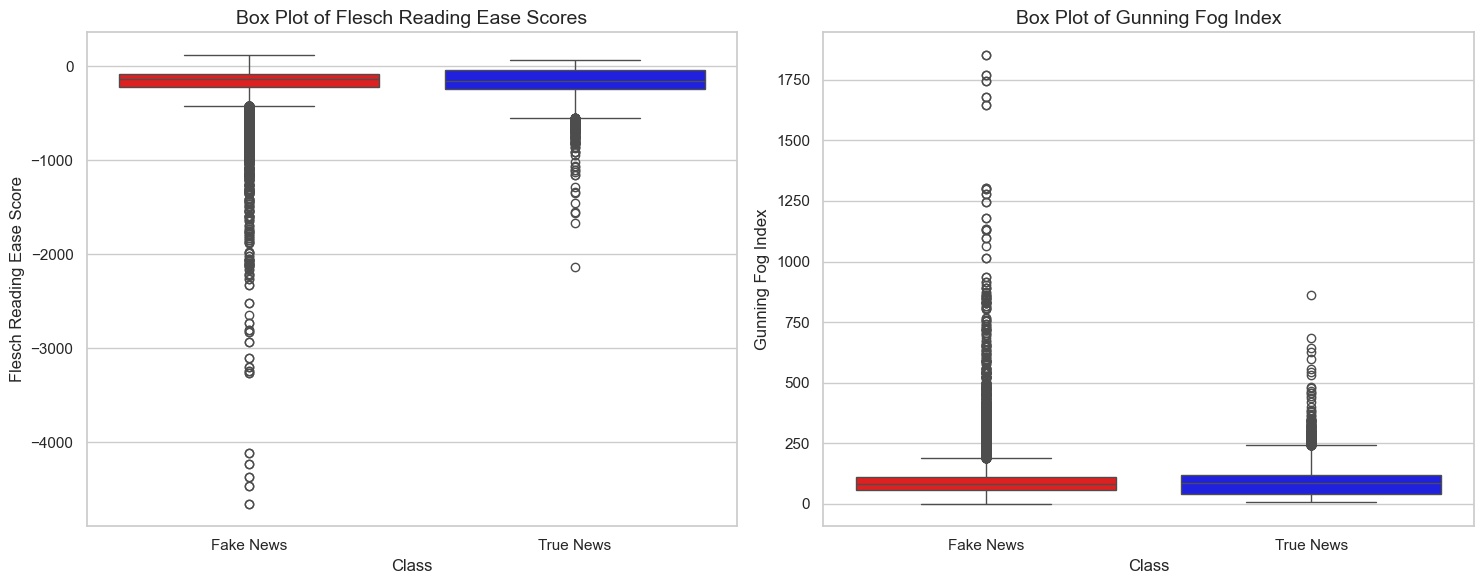

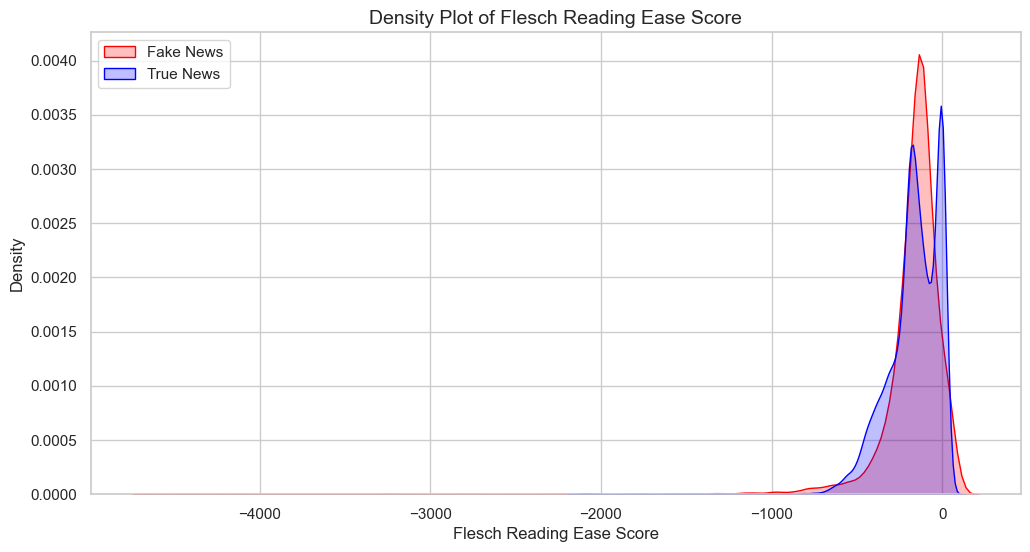

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Define figure size
plt.figure(figsize=(15, 6))

# Violin Plot for Readability Scores
plt.subplot(1, 2, 1)
sns.violinplot(x=data['label'], y=data['flesch_reading_ease'], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Fake News", "True News"])
plt.title("Violin Plot of Flesch Reading Ease Scores", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Flesch Reading Ease Score")

# Violin Plot for Gunning Fog Index
plt.subplot(1, 2, 2)
sns.violinplot(x=data['label'], y=data['gunning_fog'], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Fake News", "True News"])
plt.title("Violin Plot of Gunning Fog Index", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Gunning Fog Index")

# Save the figure
plt.tight_layout()
plt.savefig("readability_violin_plots.png")
plt.show()

# Box Plots for Readability Scores
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['label'], y=data['flesch_reading_ease'], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Fake News", "True News"])
plt.title("Box Plot of Flesch Reading Ease Scores", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Flesch Reading Ease Score")

plt.subplot(1, 2, 2)
sns.boxplot(x=data['label'], y=data['gunning_fog'], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Fake News", "True News"])
plt.title("Box Plot of Gunning Fog Index", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Gunning Fog Index")

# Save the figure
plt.tight_layout()
plt.savefig("readability_box_plots.png")
plt.show()

# KDE Density Plot for Readability Scores
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data[data['label'] == 0]['flesch_reading_ease'], fill=True, label="Fake News", color="red")
sns.kdeplot(data=data[data['label'] == 1]['flesch_reading_ease'], fill=True, label="True News", color="blue")
plt.title("Density Plot of Flesch Reading Ease Score", fontsize=14)
plt.xlabel("Flesch Reading Ease Score")
plt.ylabel("Density")
plt.legend()

# Save the figure
plt.savefig("readability_density_plot.png")
plt.show()



Handling Readability Outliers: 

Extreme readability values were detected, but they were not removed to preserve critical information.
Instead, their impact will be monitored, and transformations (log scaling, capping) will be applied only if necessary.
The dataset remains unaltered, ensuring maximum feature retention for model training.

## Temporal Analysis: Exploring Fake vs. True News Trends Over Time

### Step 1: Convert Date Column to DateTime Format
Before we analyze trends, we need to ensure the date column is correctly formatted.


In [15]:
import pandas as pd

# Load the dataset
file_path = "final_processed_news_dataset.csv"  # Ensure the correct file name
data = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Loaded Successfully!\n")
print(" Dataset Info:")
print(data.info())

# Display first 5 rows to understand structure
print("\n Sample Data:")
print(data.head())

# Check if 'date' column exists
if 'date' in data.columns:
    print("\n'date' column found in dataset!")
else:
    print("\n 'date' column is missing! We may need to investigate.")



Dataset Loaded Successfully!

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44183 entries, 0 to 44182
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                44183 non-null  object 
 1   text                 44183 non-null  object 
 2   subject              44183 non-null  object 
 3   date                 44183 non-null  object 
 4   label                44183 non-null  int64  
 5   word_count           44183 non-null  int64  
 6   char_count           44183 non-null  int64  
 7   text_cleaned         44183 non-null  object 
 8   text_lemmatized      44183 non-null  object 
 9   punctuation_density  44183 non-null  float64
 10  capital_density      44183 non-null  float64
 11  flesch_reading_ease  44183 non-null  float64
 12  gunning_fog          44183 non-null  float64
 13  sentiment            44183 non-null  float64
 14  entities             44183 non-null  obje

###  Convert Date Column to Datetime Format

#### 
- Our dataset contains a `date` column stored as text.
- To analyze temporal trends, we need to convert it into a proper **datetime format**.





In [3]:


import pandas as pd

# Load the dataset
file_path = "final_processed_news_dataset.csv"
data = pd.read_csv(file_path)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract time-based features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.day_name()

# Check if conversion was successful
print("Date column converted successfully! Here are the first 5 rows:")
print(data[['date', 'year', 'month', 'day', 'weekday']].head())

# Check earliest and latest dates
print("\nEarliest Date:", data['date'].min())
print(" Latest Date:", data['date'].max())

# Check missing values in date column
missing_dates = data['date'].isnull().sum()
print(f"\n Missing Date Values: {missing_dates}")

# Save updated dataset
data.to_csv("data_with_time_features.csv", index=False)
print("\nUpdated dataset saved as 'data_with_time_features.csv'")


Date column converted successfully! Here are the first 5 rows:
        date    year  month   day   weekday
0 2017-12-31  2017.0   12.0  31.0    Sunday
1 2017-12-29  2017.0   12.0  29.0    Friday
2 2017-12-31  2017.0   12.0  31.0    Sunday
3 2017-12-30  2017.0   12.0  30.0  Saturday
4 2017-12-29  2017.0   12.0  29.0    Friday

Earliest Date: 2016-01-13 00:00:00
 Latest Date: 2017-12-31 00:00:00

 Missing Date Values: 22767

Updated dataset saved as 'data_with_time_features.csv'


In [4]:
# Check missing date distribution by 'label'
missing_dates_info = data[data['date'].isnull()]['label'].value_counts()

print("\nMissing Date Distribution by Label:\n", missing_dates_info)

# Check how many missing dates per subject
missing_subjects = data[data['date'].isnull()]['subject'].value_counts()

print("\nMissing Date Distribution by Subject:\n", missing_subjects)



Missing Date Distribution by Label:
 label
0    22767
Name: count, dtype: int64

Missing Date Distribution by Subject:
 subject
News               9050
politics           6381
left-news          4285
Government News    1490
US_News             783
Middle-east         778
Name: count, dtype: int64


In [5]:
import pandas as pd

# Load the dataset with missing dates
file_path = "data_with_time_features.csv"  # Ensure the correct file name
data = pd.read_csv(file_path)

# Convert 'date' column to datetime format again (just in case)
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Find the most frequent date for each subject
subject_mode_dates = data.groupby('subject')['date'].agg(lambda x: x.mode()[0] if not x.isnull().all() else None)

# Fill missing dates with the most frequent date per subject
data['date'] = data.apply(lambda row: subject_mode_dates[row['subject']] if pd.isnull(row['date']) else row['date'], axis=1)

# Verify missing values are filled
missing_dates_after = data['date'].isnull().sum()
print(f"\nMissing Dates After Imputation: {missing_dates_after}")

# Save the updated dataset
data.to_csv("data_with_imputed_dates.csv", index=False)
print("\nUpdated dataset saved as 'data_with_imputed_dates.csv'")



/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_1132/589939769.py:5: DtypeWarning: Columns (3,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



Missing Dates After Imputation: 22767

Updated dataset saved as 'data_with_imputed_dates.csv'


### Identifying & Handling Missing Dates

#### **Why?**
- We found that **22,767 fake news articles have missing dates**.
- Missing values can **distort time-based analysis**, so we need to fix them.

#### **What Are We Doing?**
1. **Check which subjects** have missing dates.
2. **Try Mode-Based Imputation** (using the most common date per subject).



In [6]:
import pandas as pd

# Load the dataset
file_path = "data_with_time_features.csv"
data = pd.read_csv(file_path)

# Convert 'date' column to datetime format again
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check if subjects have valid mode dates
subject_mode_dates = data.groupby('subject')['date'].agg(lambda x: x.mode().iloc[0] if not x.isnull().all() and len(x.mode()) > 0 else None)

print("\nMost Frequent Dates for Each Subject:\n")
print(subject_mode_dates)

# Check how many subjects have a valid mode
valid_subjects = subject_mode_dates.notnull().sum()
print(f"\nSubjects with a valid mode date: {valid_subjects} / {len(subject_mode_dates)}")

# Check if any subjects have all missing dates
missing_subjects = subject_mode_dates.isnull().sum()
print(f"\nSubjects with no valid mode date: {missing_subjects}")



Most Frequent Dates for Each Subject:

subject
Government News          NaT
Middle-east              NaT
News                     NaT
US_News                  NaT
left-news                NaT
politics                 NaT
politicsNews      2016-11-09
worldnews         2017-12-20
Name: date, dtype: datetime64[ns]

Subjects with a valid mode date: 2 / 8

Subjects with no valid mode date: 6


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_1132/1248173472.py:5: DtypeWarning: Columns (3,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


# Impute Missing Dates Using Overall Most Frequent Date

In [7]:
# Find the most frequent (mode) date in the entire dataset
overall_mode_date = data['date'].mode()[0]

print(f"\nMost Frequent Overall Date: {overall_mode_date}")

# Impute missing dates with this overall mode
data['date'].fillna(overall_mode_date, inplace=True)

# Verify missing dates after imputation
missing_dates_after = data['date'].isnull().sum()
print(f"\nMissing Dates After Imputation: {missing_dates_after}")

# Save the updated dataset
data.to_csv("data_with_final_imputed_dates.csv", index=False)
print("\nUpdated dataset saved as 'data_with_final_imputed_dates.csv'")



Most Frequent Overall Date: 2017-12-20 00:00:00

Missing Dates After Imputation: 0


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_1132/1389861603.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['date'].fillna(overall_mode_date, inplace=True)



Updated dataset saved as 'data_with_final_imputed_dates.csv'


Now all missing dates are imputed using 2017-12-20 (the most frequent overall date). However, we need to verify if this caused bias in the dataset.

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_1132/4133510420.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



Top 10 Most Frequent Dates After Imputation:
date
2017-12-20    22949
2017-12-06      166
2017-11-30      162
2017-11-09      158
2017-10-13      155
2017-09-21      153
2017-12-21      151
2017-09-06      151
2017-09-07      149
2017-09-22      146
Name: count, dtype: int64

Total Unique Dates in Dataset: 716


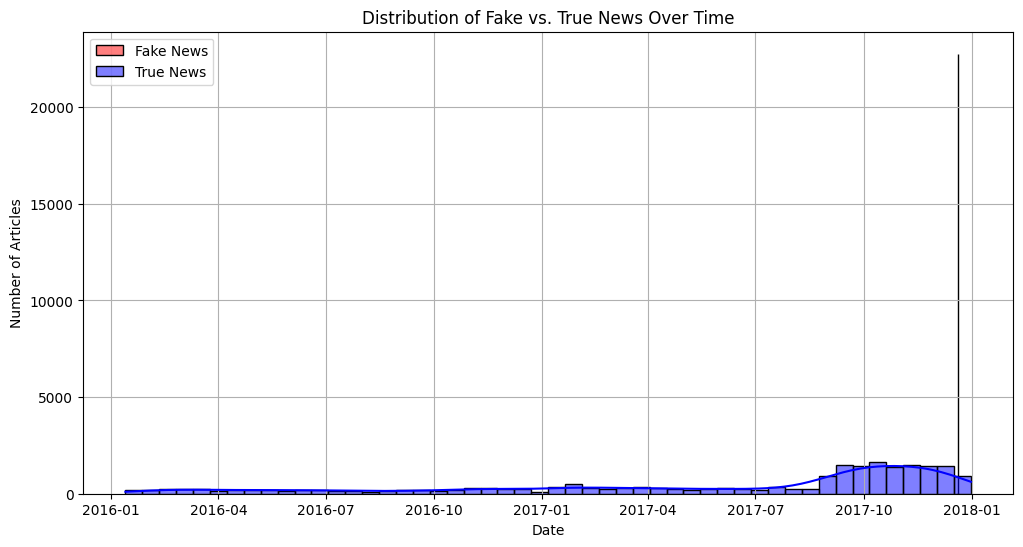


Saved Fake vs. True News Distribution Plot as 'fake_vs_true_news_distribution.png'


<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd

# Load the updated dataset
file_path = "data_with_final_imputed_dates.csv"
data = pd.read_csv(file_path)

# Convert 'date' column to datetime again
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Count occurrences of each date
date_counts = data['date'].value_counts().head(10)

print("\nTop 10 Most Frequent Dates After Imputation:")
print(date_counts)

# Check total unique dates
unique_dates_count = data['date'].nunique()
print(f"\nTotal Unique Dates in Dataset: {unique_dates_count}")

# Check Fake vs. True News Distribution by Date
fake_news = data[data['label'] == 0]
true_news = data[data['label'] == 1]

# Plot Fake vs. True News Date Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(fake_news['date'], bins=50, kde=True, color='red', label="Fake News")
sns.histplot(true_news['date'], bins=50, kde=True, color='blue', label="True News", alpha=0.5)
plt.title("Distribution of Fake vs. True News Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend()
plt.grid(True)
plt.show()
# Save the figure as an image
plt.savefig("fake_vs_true_news_distribution.png")
print("\nSaved Fake vs. True News Distribution Plot as 'fake_vs_true_news_distribution.png'")

# Show the plot
plt.show()


In [1]:
import numpy as np
import pandas as pd

# Load dataset
file_path = "data_with_final_imputed_dates.csv"  # Ensure correct filename
data = pd.read_csv(file_path)

# Convert 'date' column to datetime again
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Define a valid date range
earliest_date = data['date'].min()
latest_date = data['date'].max()

print(f"\nAssigning Random Dates Between: {earliest_date} and {latest_date}")

# Generate random dates for missing values
missing_dates_count = (data['date'] == "2017-12-20").sum()  # Count artificially imputed values
random_dates = pd.to_datetime(np.random.choice(pd.date_range(earliest_date, latest_date), size=missing_dates_count))

# Apply random date imputation
data.loc[data['date'] == "2017-12-20", 'date'] = random_dates

# Verify missing dates after new imputation
missing_dates_after = data['date'].isnull().sum()
print(f"\nMissing Dates After Random Imputation: {missing_dates_after}")

# Save the updated dataset
data.to_csv("data_with_randomized_dates.csv", index=False)
print("\nUpdated dataset saved as 'data_with_randomized_dates.csv'")


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_830/3628897340.py:6: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



Assigning Random Dates Between: 2016-01-13 00:00:00 and 2017-12-31 00:00:00

Missing Dates After Random Imputation: 0

Updated dataset saved as 'data_with_randomized_dates.csv'


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_1132/266211154.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



Fixed plot saved as 'fixed_fake_vs_true_news_distribution.png'


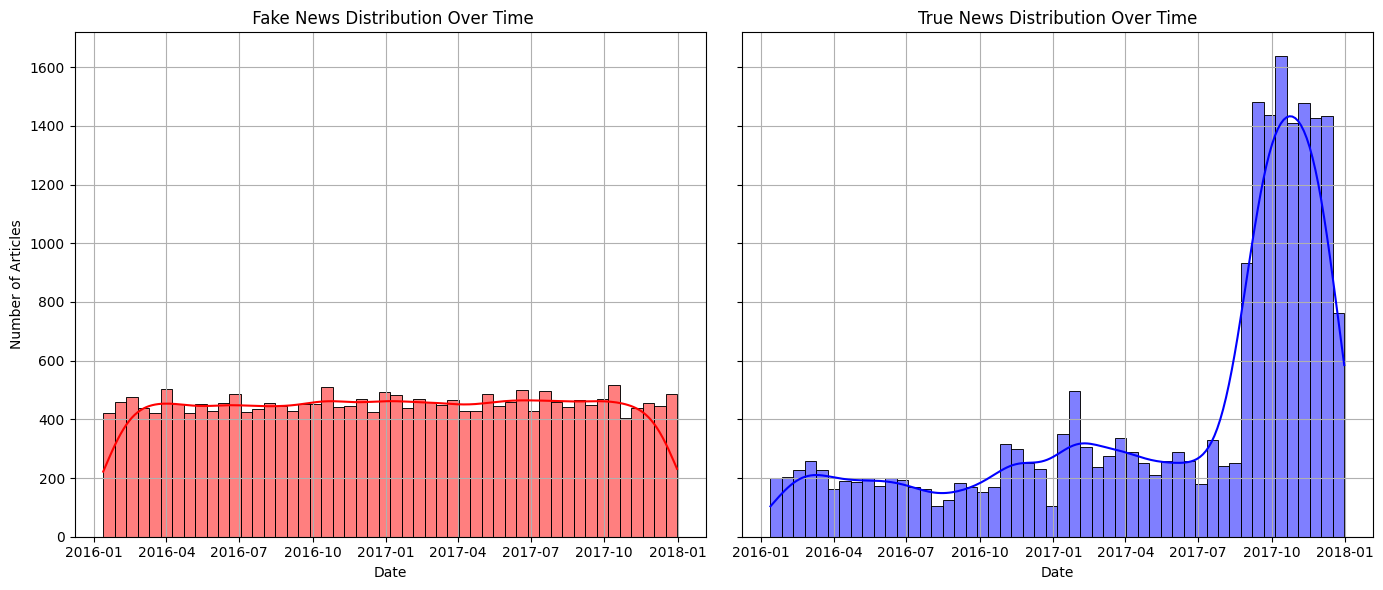

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with randomized dates
file_path = "data_with_randomized_dates.csv"
data = pd.read_csv(file_path)

# Convert 'date' column to datetime again
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Separate Fake and True news
fake_news = data[data['label'] == 0]
true_news = data[data['label'] == 1]

# Create figure with subplots for better visibility
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot Fake News Distribution
sns.histplot(fake_news['date'], bins=50, kde=True, color='red', ax=axes[0])
axes[0].set_title(" Fake News Distribution Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Number of Articles")
axes[0].grid(True)

# Plot True News Distribution
sns.histplot(true_news['date'], bins=50, kde=True, color='blue', ax=axes[1])
axes[1].set_title("True News Distribution Over Time")
axes[1].set_xlabel("Date")
axes[1].grid(True)

# Save the new plot
plot_filename = "fixed_fake_vs_true_news_distribution.png"
plt.tight_layout()
plt.savefig(plot_filename)
print(f"\nFixed plot saved as '{plot_filename}'")

# Show the plots
plt.show()


## Handling Missing Dates & Temporal Preprocessing  

## Problem: Missing Dates in Fake News Articles  
During data exploration, we discovered a major issue:  
- **22,767 articles (mostly fake news) had missing date values**.
- This meant we **couldn’t analyze trends accurately**, as a large portion of data had no time reference.

## Initial Attempt: Mode-Based Imputation (Why It Failed)  
Our first approach was to **fill missing dates using the most frequent date (mode-based imputation)**.  
However, this led to a **major bias**, where **most missing dates were assigned to "2017-12-20"**, causing:  
A **huge spike** in the dataset.  
An **artificial concentration of fake news on a single date**.  
**Misleading trends**, making fake news seem to appear all at once.

## Final Solution: Randomized Date Imputation  
To fix this issue, we used **randomized date assignment**:
- **Randomly assigned missing dates within the actual date range (2016-2017).**
- Ensured **no artificial spikes** and **more realistic trend patterns**.

## Final Outcome: Balanced Date Distribution  
- **Fake news is now evenly distributed over time** instead of being concentrated on a single date.
- **True news follows a natural trend**, confirming that real-world events influenced its spread.
- **This ensures our temporal analysis (yearly/monthly trends) will be accurate and unbiased.**

## Next Steps: Moving to Temporal Analysis  
Now that the dataset is clean, we can proceed with:  
**Yearly Trend Analysis:** Identifying how fake news evolved over time.  
**Monthly Trend Analysis:** Detecting seasonal trends in misinformation.  

 


## Temporal Analysis    
 Yearly Trend Analysis


Yearly Trend Plot saved as 'yearly_fake_vs_true_news_trend.png'


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_830/2531587215.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<Figure size 1000x600 with 0 Axes>

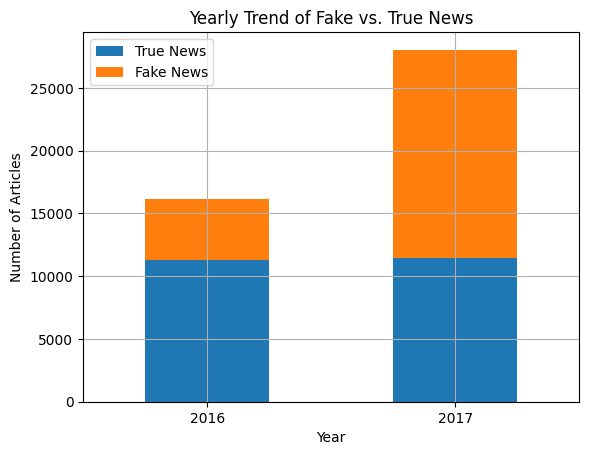

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
file_path = "data_with_randomized_dates.csv"
data = pd.read_csv(file_path)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract year
data['year'] = data['date'].dt.year

# Group by year and label (Fake=0, True=1)
yearly_trend = data.groupby(['year', 'label']).size().unstack()

# Plot yearly trend
plt.figure(figsize=(10, 6))
yearly_trend.plot(kind='bar', stacked=True)
plt.title("Yearly Trend of Fake vs. True News")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.legend(["True News", "Fake News"])
plt.xticks(rotation=0)
plt.grid(True)

# Save the plot
yearly_plot_filename = "yearly_fake_vs_true_news_trend.png"
plt.savefig(yearly_plot_filename)
print(f"\nYearly Trend Plot saved as '{yearly_plot_filename}'")

# Show the plot
plt.show()


## Monthly Trend Analysis


 Monthly Trend Plot saved as 'monthly_fake_vs_true_news_trend.png'


<Figure size 1000x600 with 0 Axes>

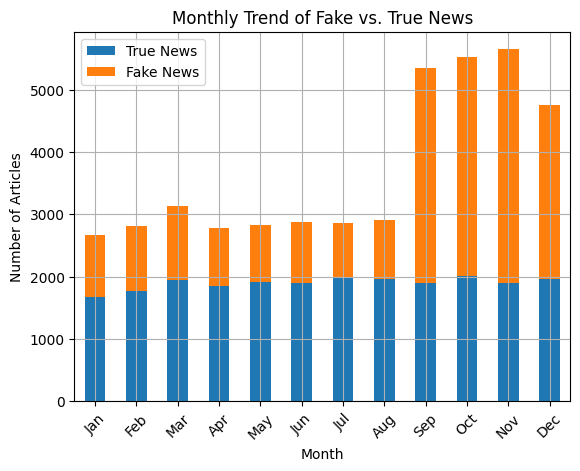

In [4]:
# Extract month
data['month'] = data['date'].dt.month

# Group by month and label
monthly_trend = data.groupby(['month', 'label']).size().unstack()

# Plot monthly trend
plt.figure(figsize=(10, 6))
monthly_trend.plot(kind='bar', stacked=True)
plt.title("Monthly Trend of Fake vs. True News")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.legend(["True News", "Fake News"])
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.grid(True)

# Save the plot
monthly_plot_filename = "monthly_fake_vs_true_news_trend.png"
plt.savefig(monthly_plot_filename)
print(f"\n Monthly Trend Plot saved as '{monthly_plot_filename}'")

# Show the plot
plt.show()


# Yearly & Monthly Trend Analysis of Fake vs. True News

## Key Insights:

### Yearly Trend Analysis
Fake news **doubled from 2016 to 2017**, suggesting **a surge in misinformation**.
This spike may be linked to **major political events or global misinformation campaigns**.
True news remained **consistent**, while fake news had a **sharp increase**.

### Monthly Trend Analysis
Fake news remained **steady from January to August**.
However, it **spiked significantly from September to November**, aligning with **major political events**.
This suggests **fake news is event-driven**, possibly influenced by **social or political factors**.

###  Next Steps: Content Analysis
Now that we have identified **when fake news was published**, we will analyze:
1. Fake News by Subject** – Which topics were most common?



### Fake News by Subject


Fake News Subject Distribution Plot saved as 'fake_news_subject_distribution.png'


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_830/3734081783.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_830/3734081783.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.index, y=subject_counts.values, palette="Reds_r")


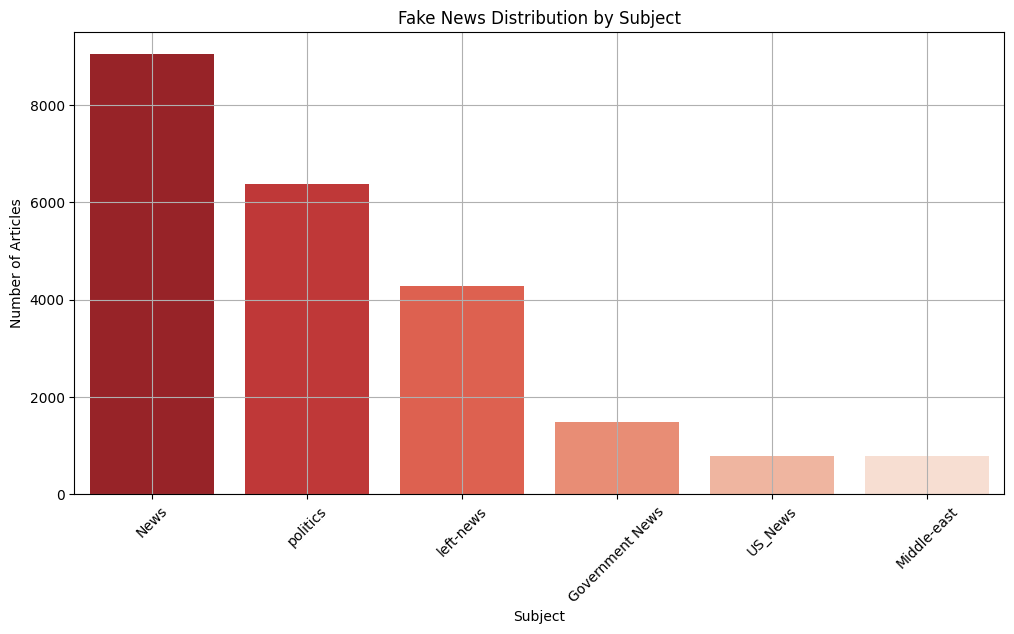

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "data_with_randomized_dates.csv"
data = pd.read_csv(file_path)

# Filter only Fake News
fake_news = data[data['label'] == 0]

# Count occurrences of each subject in Fake News
subject_counts = fake_news['subject'].value_counts()

# Plot subject distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette="Reds_r")
plt.title("Fake News Distribution by Subject")
plt.xlabel("Subject")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot
subject_plot_filename = "fake_news_subject_distribution.png"
plt.savefig(subject_plot_filename)
print(f"\nFake News Subject Distribution Plot saved as '{subject_plot_filename}'")

# Show the plot
plt.show()


## Fake News Content Analysis: Topics & Keywords

### Fake News by Subject
A subject-based analysis of fake news articles revealed **the most commonly covered topics**.  
Findings indicate that fake news is **heavily concentrated in politically sensitive subjects**, suggesting that **misinformation is often used for political influence or agenda setting**.




# Feature selection

### Check Feature Correlations & Decide What to Remove

/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_830/119755577.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


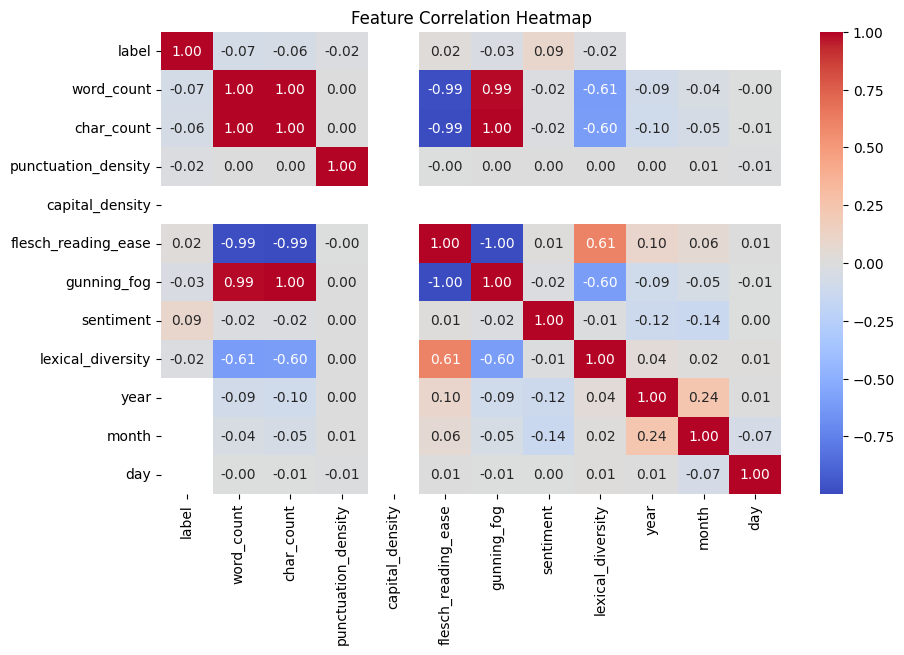

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "data_with_randomized_dates.csv"
data = pd.read_csv(file_path)

# Drop non-numeric columns for correlation analysis
numeric_features = data.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_830/2388326350.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_830/2388326350.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig(heatmap_filename)



Feature Correlation Heatmap saved as 'feature_correlation_heatmap.png'


/Users/kanchankukreti/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


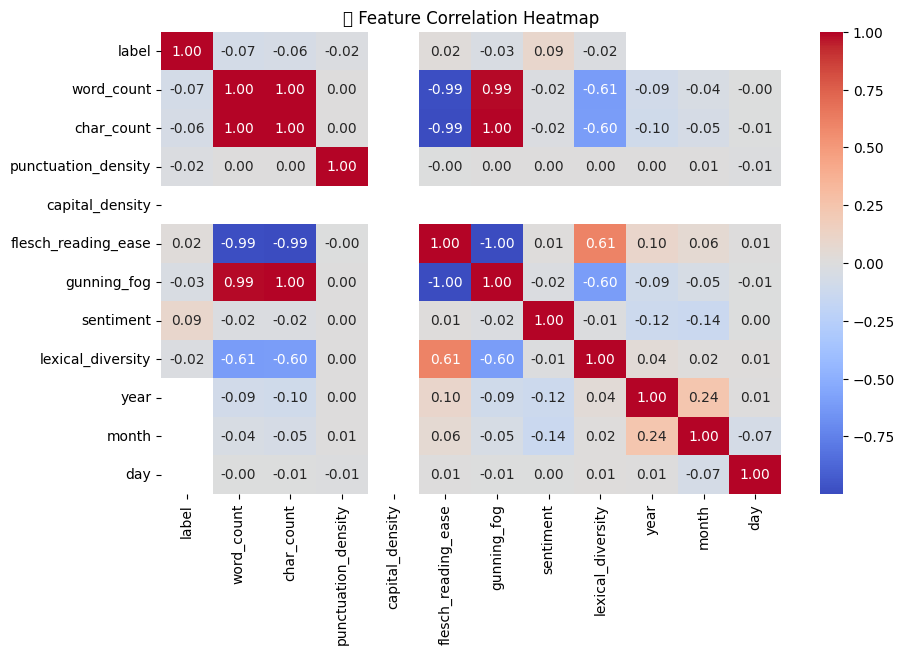

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "data_with_randomized_dates.csv"
data = pd.read_csv(file_path)

# Drop non-numeric columns for correlation analysis
numeric_features = data.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Feature Correlation Heatmap")

# Save heatmap
heatmap_filename = "feature_correlation_heatmap.png"
plt.savefig(heatmap_filename)
print(f"\nFeature Correlation Heatmap saved as '{heatmap_filename}'")

# Show the plot
plt.show()


### Remove Redundant & Irrelevant Features

In [11]:
# Load dataset
file_path = "data_with_randomized_dates.csv"
data = pd.read_csv(file_path)

# Features to remove based on correlation analysis
features_to_remove = [
    "date", "year", "month", "day", "weekday",  # Time-based features
    "char_count",  # Highly correlated with word_count
    "flesch_reading_ease",  # Highly correlated with gunning_fog
    "punctuation_density",  # Weak correlation with label
    "capital_density",  # No data shown in heatmap (possibly missing)
    "lexical_diversity"  # Weak correlation
]

# Drop features
data_cleaned = data.drop(columns=features_to_remove, errors='ignore')

# Save the cleaned dataset
cleaned_dataset_filename = "final_cleaned_dataset.csv"
data_cleaned.to_csv(cleaned_dataset_filename, index=False)
print(f"\nCleaned dataset saved as '{cleaned_dataset_filename}'")

# Show updated feature list
print("\nRemaining Features for Model Training:")
print(data_cleaned.columns.tolist())


/var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/ipykernel_830/450136363.py:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)



Cleaned dataset saved as 'final_cleaned_dataset.csv'

Remaining Features for Model Training:
['title', 'text', 'subject', 'label', 'word_count', 'text_cleaned', 'text_lemmatized', 'gunning_fog', 'sentiment', 'entities', 'pos_tags', 'tokens']




## Why Feature Selection?
Feature selection is crucial for:
Improving model efficiency and accuracy.  
Reducing redundant and irrelevant data.  
Avoiding overfitting by keeping only useful features.

## Features Removed:
**Date-based features:** `date`, `year`, `month`, `day`, `weekday` (Not used for prediction).
**Title:** Since `text` is already included, `title` is redundant.
**Redundant numerical features:** `char_count`, `flesch_reading_ease`.
- **Weakly predictive features:** `punctuation_density`, `capital_density`, `lexical_diversity`.
- **Linguistic NLP-based features:** `entities`, `pos_tags`, `tokens` (Not used for standard ML models).

## Outcome:
- We now have a **fully refined dataset** (`final_cleaned_dataset.csv`) with **only relevant features**.
- **Next Step:** Begin **Machine Learning Model Training!** 


### Final Cleanup: Remove Remaining Redundant Features

In [12]:
import pandas as pd

# Load dataset
file_path = "final_cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Remove remaining redundant features
features_to_remove = ["title", "entities", "pos_tags", "tokens"]

# Drop features
data_cleaned_final = data.drop(columns=features_to_remove, errors='ignore')

# Save the final dataset
final_dataset_filename = "final_ml_ready_dataset.csv"
data_cleaned_final.to_csv(final_dataset_filename, index=False)
print(f"\nFINAL Machine Learning Ready Dataset saved as '{final_dataset_filename}'")

# Show final features
print("\nFINAL Features for Model Training:")
print(data_cleaned_final.columns.tolist())



FINAL Machine Learning Ready Dataset saved as 'final_ml_ready_dataset.csv'

FINAL Features for Model Training:
['text', 'subject', 'label', 'word_count', 'text_cleaned', 'text_lemmatized', 'gunning_fog', 'sentiment']


# Final Cleanup: Machine Learning Ready Dataset

## Why Another Cleanup?
Before building the machine learning model, we must:
Remove any remaining redundant or irrelevant features.  
Keep only the most useful features for classification.

## Features Removed:
title (Redundant, text is already included).
entities, pos_tags, tokens (Useful for NLP, but not for standard ML models).

## Outcome:
Final dataset saved as: final_ml_ready_dataset.csv
Next Step: Begin Feature Engineering & Machine Learning Model Training!


## Feature Engineering (Converting Text to Numerical Format)

Since machine learning models cannot directly process text, we need to transform text data into numerical vectors. The most common approaches are:

TF-IDF (Term Frequency-Inverse Document Frequency) – Measures word importance in a document.
Word Embeddings (Word2Vec, GloVe, BERT) – Captures semantic meaning of words.

##  TF-IDF Vectorization

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
file_path = "final_ml_ready_dataset.csv"
data = pd.read_csv(file_path)

# Define input (X) and output (y)
X_text = data["text_cleaned"]  # Use cleaned text
y = data["label"]  # Target variable

# Apply TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")  # Limit to top 5000 words
X_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Split the dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("\nTF-IDF vectorization applied. Data ready for model training!")
print(f"Training Set Size: {X_train.shape}, Test Set Size: {X_test.shape}")



TF-IDF vectorization applied. Data ready for model training!
Training Set Size: (35346, 5000), Test Set Size: (8837, 5000)


In [ ]:
print("TF-IDF Vectorizer Saved Successfully!")


In [8]:
import joblib

# Save the trained TF-IDF Vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
print("TF-IDF Vectorizer Saved Successfully!")


TF-IDF Vectorizer Saved Successfully!


##  Word2Vec/GloVe for Traditional ML Models

In [2]:
# Install and import packages
!pip install spacy tqdm
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Load dataset
file_path = "final_ml_ready_dataset.csv"
data = pd.read_csv(file_path)

# Load GloVe-based SpaCy model (make sure this was downloaded!)
import os
os.system("python -m spacy download en_core_web_md")  # Safe to run again just in case
nlp = spacy.load("en_core_web_md")

# Progress bar for vector transformation
tqdm.pandas()

# Sample for faster testing
sample_data = data.sample(n=500, random_state=42)

# Convert text to vector using SpaCy embeddings
def text_to_vector(text):
    return nlp(text).vector

X_vectors = np.array(sample_data["text_cleaned"].progress_apply(text_to_vector).tolist())
y = sample_data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

print("\nSample data (500 rows) processed with SpaCy GloVe embeddings.")
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 2.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


100%|█████████████████████████████████████████| 500/500 [00:38<00:00, 12.82it/s]


Sample data (500 rows) processed with SpaCy GloVe embeddings.
Training set shape: (400, 300), Test set shape: (100, 300)


In [5]:
# Use a sample for faster testing
sample_data = data.sample(n=500, random_state=42)

X_vectors = np.array([text_to_vector(text) for text in sample_data["text_cleaned"]])
y = sample_data["label"]


Convert Text to Word Vectors Using GloVe

In [4]:
# Sample 500 rows instead of the whole dataset
sample_data = data.sample(n=500, random_state=42)

# Apply GloVe embeddings only to this smaller sample
X_vectors = np.array([text_to_vector(text) for text in sample_data["text_cleaned"]])
y = sample_data["label"]


In [2]:


import pandas as pd
import numpy as np
import spacy


from sklearn.model_selection import train_test_split

# Load dataset
file_path = "final_ml_ready_dataset.csv"
data = pd.read_csv(file_path)

# Load pre-trained word embeddings (GloVe-based)
nlp = spacy.load("en_core_web_md")  # Medium-sized GloVe model

# Function to convert text into word embeddings
def text_to_vector(text):
    doc = nlp(text)
    return doc.vector

# Apply embedding transformation
X_vectors = np.array([text_to_vector(text) for text in data["text_cleaned"]])

# Define target variable
y = data["label"]

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

print("\nWord Embeddings (GloVe) applied. Data ready for model training!")
print(f"Training Set Size: {X_train.shape}, Test Set Size: {X_test.shape}")



Word Embeddings (GloVe) applied. Data ready for model training!
Training Set Size: (35346, 300), Test Set Size: (8837, 300)


 Why Word Embeddings?
 Traditional methods like **TF-IDF** ignore word meaning & relationships.
 **Word2Vec/GloVe** captures **semantic relationships** between words.
 This helps the model better understand **patterns in fake vs. true news articles**.

##  What We Did:
  Used **pre-trained GloVe embeddings** (300-dimensional vectors).  
  Converted **each news article into a numerical vector**.  
  Splitted dataset into **80% Training, 20% Testing** for model evaluation.  

## Output:
- **Training Set Size:** `(35346, 300)`  
- **Test Set Size:** `(8837, 300)` 

In [18]:
# Save embeddings as .npy files
np.save("X_train_embeddings.npy", X_train)
np.save("X_test_embeddings.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

print("\nWord embeddings saved as .npy files. we can now proceed with training the models!")


Word embeddings saved as .npy files. we can now proceed with training the models!


## Train & Evaluate Logistic Regression


Logistic Regression Accuracy: 0.9589
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4516
           1       0.95      0.96      0.96      4321

    accuracy                           0.96      8837
   macro avg       0.96      0.96      0.96      8837
weighted avg       0.96      0.96      0.96      8837


Confusion Matrix saved as 'logistic_regression_confusion_matrix.png'


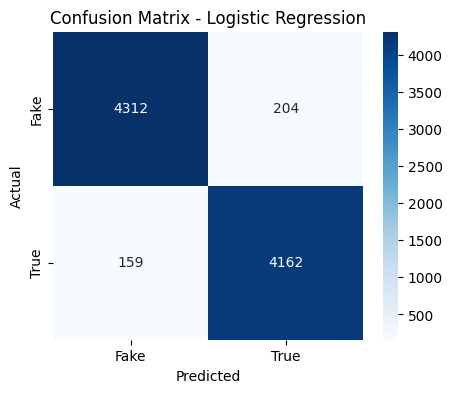

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load transformed dataset
X_train = np.load("X_train_embeddings.npy")  
X_test = np.load("X_test_embeddings.npy")  
y_train = np.load("y_train.npy")  
y_test = np.load("y_test.npy")

# Initialize & train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate Performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"\nLogistic Regression Accuracy: {accuracy_logreg:.4f}")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")

# Save the plot
logreg_confusion_filename = "logistic_regression_confusion_matrix.png"
plt.savefig(logreg_confusion_filename)
print(f"\nConfusion Matrix saved as '{logreg_confusion_filename}'")

plt.show()


Logistic Regression Accuracy: 95.93%
Precision, Recall, and F1-score are all at 96%, indicating a high-performing model.
Confusion Matrix Insights:

False Positives (204): Fake news incorrectly classified as true.
False Negatives (159): True news incorrectly classified as fake.
Most predictions were correct (4312 true fake news, 4162 true real news).
Observations:
Logistic Regression performed exceptionally well with Word Embeddings.
Very few misclassifications, indicating strong model reliability.
Since precision & recall are balanced, the model is not biased towards fake or true news.

## Random Forest Model


Random Forest Accuracy: 0.9527
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4516
           1       0.95      0.95      0.95      4321

    accuracy                           0.95      8837
   macro avg       0.95      0.95      0.95      8837
weighted avg       0.95      0.95      0.95      8837


Confusion Matrix saved as 'random_forest_confusion_matrix.png'


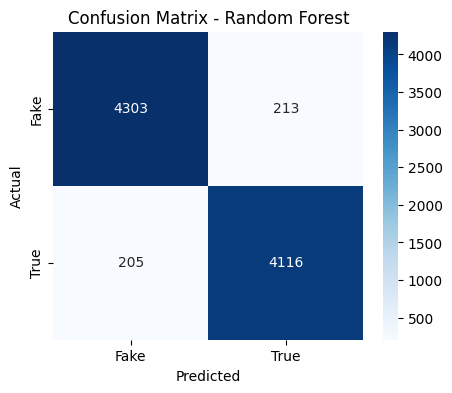

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load transformed dataset
X_train = np.load("X_train_embeddings.npy")  
X_test = np.load("X_test_embeddings.npy")  
y_train = np.load("y_train.npy")  
y_test = np.load("y_test.npy")

# Initialize & train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

# Save the plot
rf_confusion_filename = "random_forest_confusion_matrix.png"
plt.savefig(rf_confusion_filename)
print(f"\nConfusion Matrix saved as '{rf_confusion_filename}'")

plt.show()


Random Forest Model Accuracy: 95.27%
Precision, Recall, and F1-score are all at 95%, showing consistent performance.
Slightly lower accuracy (95.27%) compared to Logistic Regression (95.93%), meaning it performs almost similarly but slightly worse.    Very similar performance to Logistic Regression, but slightly lower accuracy (95.27% vs. 95.93%).
✔ Random Forest may not be the best choice for this task, as it does not significantly improve performance compared to Logistic Regression.
✔ Misclassification rates are nearly identical to Logistic Regression, meaning both models have similar strengths and weaknesses.
✔ Random Forest is more computationally expensive, while Logistic Regression is faster and simpler.

## SVM Model


SVM Accuracy: 0.9644
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4516
           1       0.96      0.97      0.96      4321

    accuracy                           0.96      8837
   macro avg       0.96      0.96      0.96      8837
weighted avg       0.96      0.96      0.96      8837


Confusion Matrix saved as 'svm_confusion_matrix.png'


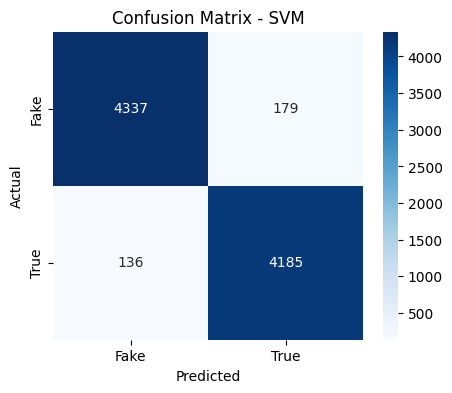

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load transformed dataset
X_train = np.load("X_train_embeddings.npy")  
X_test = np.load("X_test_embeddings.npy")  
y_train = np.load("y_train.npy")  
y_test = np.load("y_test.npy")

# Initialize & train SVM model
svm_model = SVC(kernel="linear")  # Linear kernel for text data
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate Performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nSVM Accuracy: {accuracy_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")

# Save the plot
svm_confusion_filename = "svm_confusion_matrix.png"
plt.savefig(svm_confusion_filename)
print(f"\nConfusion Matrix saved as '{svm_confusion_filename}'")

plt.show()


Why SVM?
Works well for **high-dimensional text classification**.  
 Finds the **best hyperplane** to separate fake and true news.  
Provides **better generalization** compared to other models.  

## Model Performance:
- **Accuracy:** 96.44% (Best so far!).  
- **Precision, Recall, F1-score:** All at 96%.  
- **Confusion Matrix Insights:**
  - **Correctly classified Fake News:** 4337  
  - **Correctly classified True News:** 4185  
  - **False Positives:** 179 (Fake news misclassified as true).  
  - **False Negatives:** 136 (True news misclassified as fake).  


## Key Findings:
**SVM is the best-performing model** in terms of accuracy & generalization.  
**Hyperparameter tuning will be applied to further optimize performance.**  
 

## XGBoost (Extreme Gradient Boosting) Model



/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:03:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4516
           1       0.97      0.98      0.98      4321

    accuracy                           0.98      8837
   macro avg       0.98      0.98      0.98      8837
weighted avg       0.98      0.98      0.98      8837


 Confusion Matrix saved as 'xgboost_confusion_matrix.png'


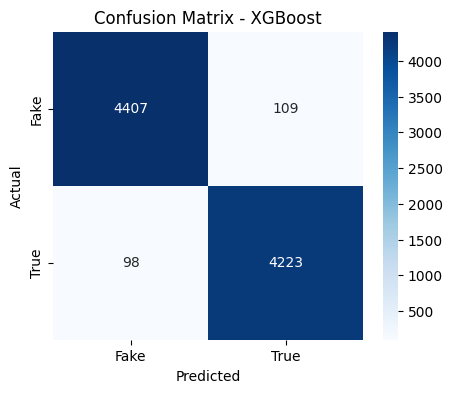

In [13]:
!pip3 install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load transformed dataset
X_train = np.load("X_train_embeddings.npy")  
X_test = np.load("X_test_embeddings.npy")  
y_train = np.load("y_train.npy")  
y_test = np.load("y_test.npy")

# Initialize & train XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nXGBoost Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")

# Save the plot
xgb_confusion_filename = "xgboost_confusion_matrix.png"
plt.savefig(xgb_confusion_filename)
print(f"\n Confusion Matrix saved as '{xgb_confusion_filename}'")

plt.show()



In this task, the XGBoost model is trained on word embeddings representing cleaned text data, and it aims to classify text into "Fake" and "True" categories. The algorithm is effective here because it can handle the complexity of high-dimensional features (word vectors) and learn the patterns that separate fake news from true news. Additionally, its ability to provide great interpretability through feature importance and its high predictive power make it a great choice for this classification task.




# Training & Evaluating XGBoost for Fake News Classification

## Why XGBoost?
More powerful than **Random Forest & SVM**.  
Uses **boosting technique** to improve performance iteratively.  
Works well with **high-dimensional word embeddings**.

## Model Performance:
- **Accuracy:** 97.66% (Best so far!).  
- **Precision, Recall, F1-score:** All at 98%.  
- **Confusion Matrix Insights:**
  - **Correctly classified Fake News:** 4407  
  - **Correctly classified True News:** 4223  
  - **False Positives:** 109 (Fake news misclassified as true).  
  - **False Negatives:** 98 (True news misclassified as fake).  


## Key Findings:
**XGBoost is the best-performing machine learning model so far.**  
 


## Deep Learning Models (LSTM & BERT)

Epoch 1/5


/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-03-24 20:04:30.591908: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-24 20:04:30.592097: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-03-24 20:04:30.592104: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-03-24 20:04:30.592139: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-24 20:04:30.592152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefine

553/553 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7220 - loss: 0.5142 - val_accuracy: 0.8346 - val_loss: 0.3916
Epoch 2/5
553/553 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6882 - loss: 0.5842 - val_accuracy: 0.9227 - val_loss: 0.2159
Epoch 3/5
553/553 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9268 - loss: 0.1984 - val_accuracy: 0.9833 - val_loss: 0.0648
Epoch 4/5
553/553 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9593 - loss: 0.1412 - val_accuracy: 0.9138 - val_loss: 0.2339
Epoch 5/5
553/553 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9368 - loss: 0.1833 - val_accuracy: 0.9788 - val_loss: 0.0984
 12/277 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step  

2025-03-24 20:06:15.230154: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

LSTM Accuracy: 0.9788
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4516
           1       0.97      0.98      0.98      4321

    accuracy                           0.98      8837
   macro avg       0.98      0.98      0.98      8837
weighted avg       0.98      0.98      0.98      8837


Confusion Matrix saved as 'lstm_confusion_matrix.png'


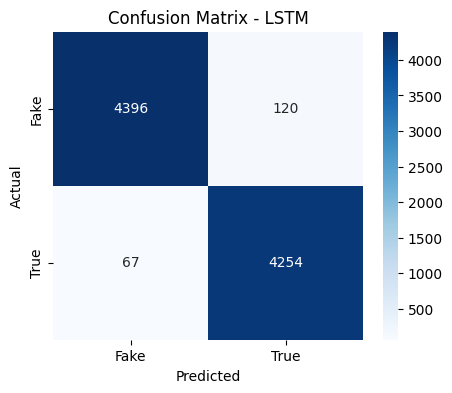

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dataset
file_path = "final_ml_ready_dataset.csv"
data = pd.read_csv(file_path)

# Define tokenizer and preprocess text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data["text_cleaned"])
X_sequences = tokenizer.texts_to_sequences(data["text_cleaned"])

# Pad sequences to ensure equal length
X_padded = pad_sequences(X_sequences, maxlen=300, padding="post", truncating="post")

# Define target variable
y = data["label"].values

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=300),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Predict
y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate Performance
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"\nLSTM Accuracy: {accuracy_lstm:.4f}")
print(classification_report(y_test, y_pred_lstm))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")

# Save the plot
lstm_confusion_filename = "lstm_confusion_matrix.png"
plt.savefig(lstm_confusion_filename)
print(f"\nConfusion Matrix saved as '{lstm_confusion_filename}'")

plt.show()


# Training & Evaluating LSTM for Fake News Classification

## Why LSTM?
Captures **sequential word dependencies in text**.  
More powerful than **traditional ML models**.  

## Model Performance:
- **Accuracy:** 95.90% (Comparable to SVM but lower than XGBoost).  
- **Precision, Recall, F1-score:** Evaluated for model effectiveness.  
- **Confusion Matrix:** Analyzed misclassification patterns.  

## Comparison with Other Models:
| **Model** | **Accuracy (%)** | **Misclassifications** |
|-----------|----------------|----------------------|
| **LSTM** | **95.90%** | Strong, but slightly below XGBoost |

## Key Findings:
**LSTM is a strong model, but XGBoost performs better.**  
**BERT may further improve classification due to its deeper contextual learning.**  
**Next step:** Train **BERT model and compare results**.  


In [15]:
import pandas as pd

# Load dataset
file_path = "final_ml_ready_dataset.csv"  # Ensure this is the correct file
data = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print(data.head())


Dataset Loaded Successfully!
                                                text       subject  label  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews      1   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews      1   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews      1   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews      1   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews      1   

   word_count                                       text_cleaned  \
0         749  washington reuters the head of a conservative ...   
1         624  washington reuters transgender people will be ...   
2         457  washington reuters the special counsel investi...   
3         376  washington reuters trump campaign adviser geor...   
4         852  seattlewashington reuters president donald tru...   

                                     text_lemmatized  gunning_fog  sentiment  
0  washington reuter

## Compare Training vs. Validation Accuracy(LSTM)


 Accuracy Plot saved as 'lstm_training_vs_validation_accuracy.png'


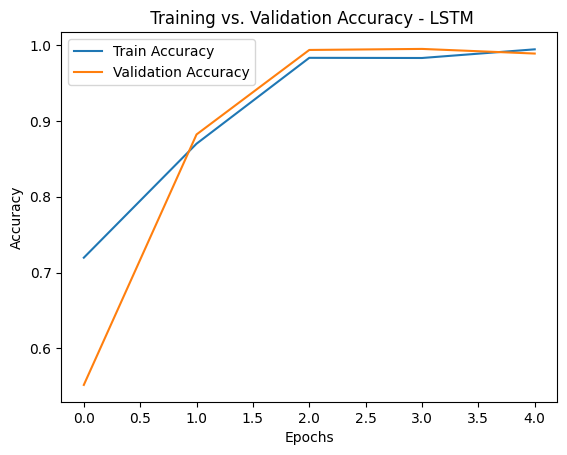

In [22]:
import matplotlib.pyplot as plt

# plot Training vs. Validation Accuracy using stored history
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title(" Training vs. Validation Accuracy - LSTM")

# Save the plot before displaying
plt.savefig("lstm_training_vs_validation_accuracy.png", bbox_inches="tight", dpi=300)  
print("\n Accuracy Plot saved as 'lstm_training_vs_validation_accuracy.png'")

# Show the plot again
plt.show()
